In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import datasets
import geopandas as gpd
import nltk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from math import pi

In [108]:
# Read the CSV file with low_memory=False
df = pd.read_csv(r"D:\git\players_22.csv", encoding="UTF-8", low_memory=False)

# Or you can specify the data type for specific columns
dtype_spec = {
    'column_name_25': 'str',
    'column_name_108': 'str',
}
df = df.map(lambda x: str(x) if isinstance(x, list) else x)
df['player_positions'] = df['player_positions'].astype(str)
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   

                            club_logo_url  \
0  https://cdn.sofifa.net/teams/73/60.png   
1  https://cdn.sofifa.net/teams/21/60.png   
2  https://cdn.sofifa.net/teams/11/60.png   
3  https://cdn.sofifa.net/teams/73/60.png   
4  https://cdn.sofifa.net/teams/10/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   

                            nation_logo_url  \
0  https://cdn.sofifa.net/teams/1369/60.png   
1  https://cdn.sofifa.net/teams/1353/60.png   
2  https://cdn.sofifa.net/teams/1354/60.png   
3                                       NaN   
4  https://cdn.sofifa.net/teams/1325/60.png   

                       nation_flag_url  
0  https://cdn.sofifa.net/flags/ar.png  
1  https://cdn.sofifa.net/flags/pl.png  
2  https://cdn.sofifa.net/flags/pt.png  
3  https://cdn.sofifa.net/flags/br.png  
4  https://cdn.sofifa.net/flags/be.png  

[5 rows x 110 columns]

In [57]:
print(df.columns)

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)


In [58]:
# Create a summary table for DataFrame information
summary = {
    'rows': df.shape[0],
    'columns': df.shape[1],
    'discrete_columns': df.select_dtypes(include=['object', 'category']).shape[1],
    'continuous_columns': df.select_dtypes(include=['number']).shape[1],
    'all_missing_columns': df.columns[df.isnull().all()].size,
    'total_missing_values': df.isnull().sum().sum(),
    'complete_rows': df.dropna().shape[0],
    'total_observations': df.size,
    'memory_usage': df.memory_usage(deep=True).sum()
}

# Print the results
for key, value in summary.items():
    print(f'{key}: {value}')

rows: 19239
columns: 110
discrete_columns: 50
continuous_columns: 60
all_missing_columns: 0
total_missing_values: 152618
complete_rows: 0
total_observations: 2116290
memory_usage: 64122891


In [59]:
# Display general information about the DataFrame
print("General information about the DataFrame:") 
print(df.info()) 
# Display descriptive statistics
print("\nDescriptive statistics:") 
print(df.describe()) 
# Display the first few rows of the DataFrame
print("\nThe first few rows of the DataFrame:") 
print(df.head())

General information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB
None

Descriptive statistics:
           sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

      

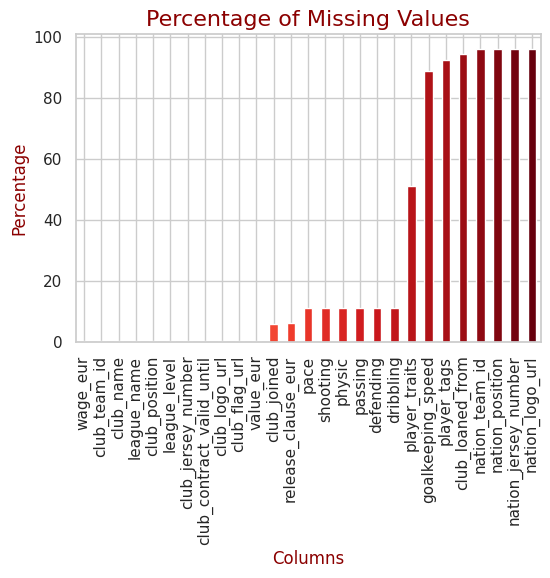

In [113]:
# Plot the percentage of missing values
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values()
plt.figure(figsize=(6, 4))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(missing)))
missing.plot(kind='bar', color=colors)
plt.title('Percentage of Missing Values', fontsize=16, color='darkred')
plt.xlabel('Columns', fontsize=12, color='darkred')
plt.ylabel('Percentage', fontsize=12, color='darkred')
plt.show()

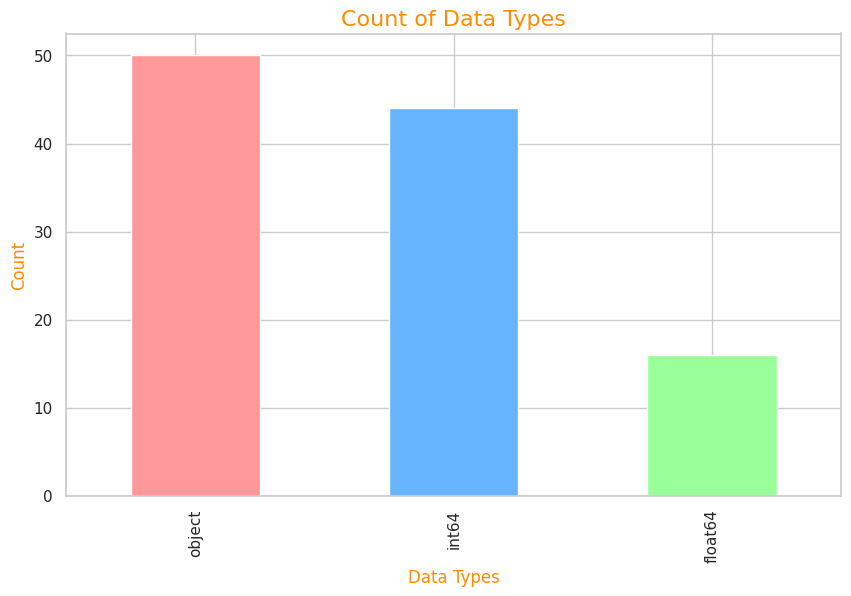

In [61]:
# Plot the count of each data type
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'pink', 'yellow']
df.dtypes.value_counts().plot(kind='bar', color=colors)
plt.title('Count of Data Types', fontsize=16, color='darkorange')
plt.xlabel('Data Types', fontsize=12, color='darkorange')
plt.ylabel('Count', fontsize=12, color='darkorange')
plt.show()

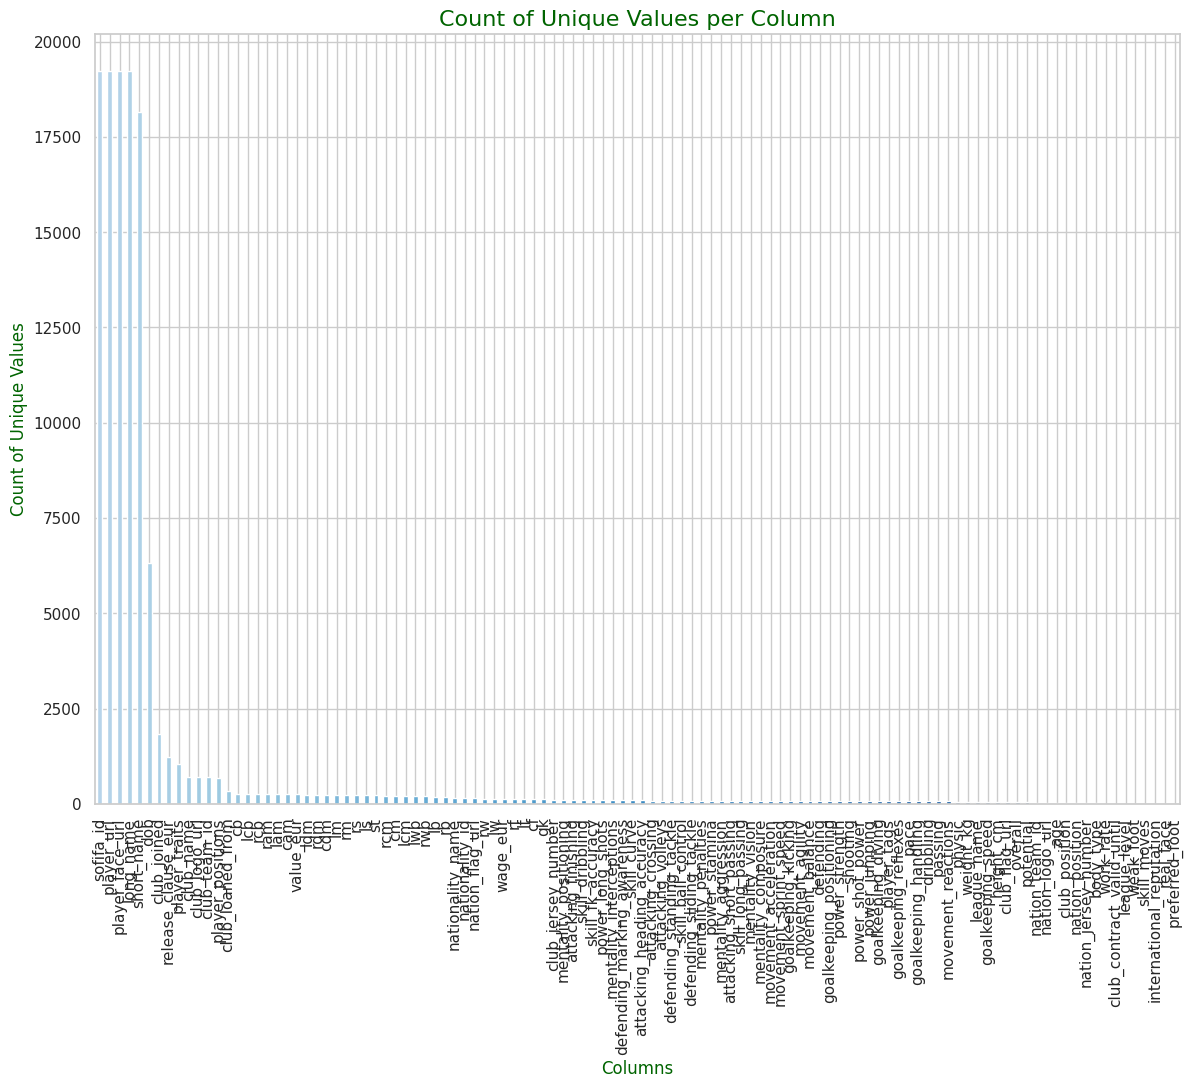

In [62]:
# Continue with the chart
plt.figure(figsize=(14, 10))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(df.nunique())))
df.nunique().sort_values(ascending=False).plot(kind='bar', color=colors)

plt.title('Count of Unique Values per Column', fontsize=16, color='darkgreen')
plt.xlabel('Columns', fontsize=12, color='darkgreen')
plt.ylabel('Count of Unique Values', fontsize=12, color='darkgreen')
plt.show()

In [63]:
# Define club lists for each league
bundesliga = [
  "1. FC Nürnberg", "1. FSV Mainz 05", "Bayer 04 Leverkusen", "FC Bayern München",
  "Borussia Dortmund", "Borussia Mönchengladbach", "Eintracht Frankfurt",
  "FC Augsburg", "FC Schalke 04", "Fortuna Düsseldorf", "Hannover 96",
  "Hertha BSC", "RB Leipzig", "SC Freiburg", "TSG 1899 Hoffenheim",
  "VfB Stuttgart", "VfL Wolfsburg", "SV Werder Bremen"
]

premierLeague = [
  "Arsenal", "Bournemouth", "Brighton & Hove Albion", "Burnley",
  "Cardiff City", "Chelsea", "Crystal Palace", "Everton", "Fulham",
  "Huddersfield Town", "Leicester City", "Liverpool", "Manchester City",
  "Manchester United", "Newcastle United", "Southampton", 
  "Tottenham Hotspur", "Watford", "West Ham United", "Wolverhampton Wanderers"
]

laliga = [
  "Athletic Club de Bilbao", "Atlético Madrid", "CD Leganés",
  "Deportivo Alavés", "FC Barcelona", "Getafe CF", "Girona FC", 
  "Levante UD", "Rayo Vallecano", "RC Celta", "RCD Espanyol", 
  "Real Betis", "Real Madrid", "Real Sociedad", "Real Valladolid CF",
  "SD Eibar", "SD Huesca", "Sevilla FC", "Valencia CF", "Villarreal CF"
]

seriea = [
  "Atalanta","Bologna","Cagliari","Chievo Verona","Empoli", "Fiorentina","Frosinone","Genoa",
  "Inter","Juventus","Lazio","Milan","Napoli","Parma","Roma","Sampdoria","Sassuolo","SPAL",
  "Torino","Udinese"
]

superlig = [
  "Akhisar Belediyespor","Alanyaspor", "Antalyaspor","Medipol Başakşehir FK","BB Erzurumspor","Beşiktaş JK",
  "Bursaspor","Çaykur Rizespor","Fenerbahçe SK", "Galatasaray SK","Göztepe SK","Kasimpaşa SK",
  "Kayserispor","Atiker Konyaspor","MKE Ankaragücü", "Sivasspor","Trabzonspor","Yeni Malatyaspor"
]

ligue1 = [
  "Amiens SC", "Angers SCO", "AS Monaco", "AS Saint-Étienne", "Dijon FCO", "En Avant de Guingamp",
  "FC Nantes", "FC Girondins de Bordeaux", "LOSC Lille", "Montpellier HSC", "Nîmes Olympique", 
  "OGC Nice", "Olympique Lyonnais","Olympique de Marseille", "Paris Saint-Germain", 
  "RC Strasbourg Alsace", "Stade Malherbe Caen", "Stade de Reims", "Stade Rennais FC", "Toulouse Football Club"
]

eredivisie = [
  "ADO Den Haag","Ajax", "AZ Alkmaar", "De Graafschap","Excelsior","FC Emmen","FC Groningen",
  "FC Utrecht", "Feyenoord","Fortuna Sittard", "Heracles Almelo","NAC Breda",
  "PEC Zwolle", "PSV","SC Heerenveen","Vitesse","VVV-Venlo","Willem II"
]

liganos = [
  "Os Belenenses", "Boavista FC", "CD Feirense", "CD Tondela", "CD Aves", "FC Porto",
  "CD Nacional", "GD Chaves", "Clube Sport Marítimo", "Moreirense FC", "Portimonense SC", "Rio Ave FC",
  "Santa Clara", "SC Braga", "SL Benfica", "Sporting CP", "Vitória Guimarães", "Vitória de Setúbal"
]

# Create mapping dictionary for leagues and countries
league_country_mapping = {
    'Bundesliga': ('Germany', bundesliga),
    'Premier League': ('UK', premierLeague),
    'La Liga': ('Spain', laliga),
    'Serie A': ('Italy', seriea),
    'Süper Lig': ('Turkey', superlig),
    'Ligue 1': ('France', ligue1),
    'Liga Nos': ('Portugal', liganos),
    'Eredivisie': ('Netherlands', eredivisie)
}

# Function to find league and country based on club name
def get_league_and_country(club_name):
    for league, (country, clubs) in league_country_mapping.items():
        if club_name in clubs:
            return league, country
    return None, None

# Apply the function to create 'League' and 'Country' columns
df['League'], df['Country'] = zip(*df['club_name'].apply(get_league_and_country))

# Filter out rows with 'League' value as None
df = df.dropna(subset=['League'])

# Display the first few rows of the DataFrame
print(df.head())

df['League'].head()


   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   

   overall  potential    value_eur  wage_eur  age  ...   rcb    rb    gk  \
0       93         93   78000000.0  320000.0   34  .

0           Ligue 1
1        Bundesliga
2    Premier League
3           Ligue 1
4    Premier League
Name: League, dtype: object

In [64]:
df['League'].head

<bound method NDFrame.head of 0               Ligue 1
1            Bundesliga
2        Premier League
3               Ligue 1
4        Premier League
              ...      
18692    Premier League
18775        Eredivisie
18832           Ligue 1
18877    Premier League
18878    Premier League
Name: League, Length: 3267, dtype: object>

In [65]:
print(df[['long_name','value_eur', 'wage_eur']].head())

                             long_name    value_eur  wage_eur
0       Lionel Andrés Messi Cuccittini   78000000.0  320000.0
1                   Robert Lewandowski  119500000.0  270000.0
2  Cristiano Ronaldo dos Santos Aveiro   45000000.0  270000.0
3        Neymar da Silva Santos Júnior  129000000.0  270000.0
4                      Kevin De Bruyne  125500000.0  350000.0


In [66]:
# Check the data types of the related columns
print(df[['value_eur', 'wage_eur']].dtypes)

# Convert the 'value_eur' and 'wage_eur' columns to string if necessary
df['value_eur'] = df['value_eur'].astype(str)
df['wage_eur'] = df['wage_eur'].astype(str)

# Process the 'Value' and 'Wage' columns
df['Values'] = df['value_eur'].str.replace('€', '').str.replace('K', '000').str.replace('M', '').astype(float)
df['Wages'] = df['wage_eur'].str.replace('€', '').str.replace('K', '000').astype(float)

# Convert 'Values' from millions to euros
df['Values'] = df['Values'].apply(lambda x: x * 1000000 if x < 1000 else x)

# Display the first few rows of the DataFrame to check
print(df[['value_eur', 'Values', 'wage_eur', 'Wages']].head())


value_eur    float64
wage_eur     float64
dtype: object
     value_eur       Values  wage_eur     Wages
0   78000000.0   78000000.0  320000.0  320000.0
1  119500000.0  119500000.0  270000.0  270000.0
2   45000000.0   45000000.0  270000.0  270000.0
3  129000000.0  129000000.0  270000.0  270000.0
4  125500000.0  125500000.0  350000.0  350000.0


In [67]:
print(df['club_position'].unique())

['RW' 'ST' 'LW' 'RCM' 'GK' 'LCB' 'RDM' 'SUB' 'CAM' 'RS' 'LCM' 'RCB' 'LDM'
 'LB' 'RB' 'LM' 'CDM' 'CB' 'CF' 'RM' 'LS' 'RES' 'RWB' 'RF' 'CM' 'LWB'
 'LAM' 'LF' 'RAM']


In [68]:
defence = ["CB", "RB", "LB", "LWB", "RWB", "LCB", "RCB"]
midfielder = ["CM", "CDM","CAM","LM","RM", "LAM", "RAM", "LCM", "RCM", "LDM", "RDM"]
forward = ["CF", "ST", "LW", "RW", "LS", "RS", "LF", "RF"]

# Classify players
df['Class'] = df['club_position'].apply(lambda x: 'Goal Keeper' if x == "GK" else
                                                  'Defender' if x in defence else
                                                  'Midfielder' if x in midfielder else
                                                  'Forward' if x in forward else
                                                  'Unknown')

# Display the first few rows of the DataFrame to check
print(df[['club_position', 'Class']].head(15))


   club_position        Class
0             RW      Forward
1             ST      Forward
2             ST      Forward
3             LW      Forward
4            RCM   Midfielder
6             ST      Forward
7             GK  Goal Keeper
8             GK  Goal Keeper
9             ST      Forward
10           RCM   Midfielder
13            LW      Forward
15           LCB     Defender
16            LW      Forward
17            RW      Forward
18            GK  Goal Keeper


In [69]:
# Filter values "Left" and "Right"
df = df[df['preferred_foot'].isin(["Left", "Right"])]

# Convert the 'Preferred.Foot' column to category type
df['Preferred.Foot'] = df['preferred_foot'].astype('category')

# Display the DataFrame to check the result
print(df[['Preferred.Foot']].head())
print(df.dtypes)  # Check the data type of the 'Preferred.Foot' column

  Preferred.Foot
0           Left
1          Right
2          Right
3          Right
4          Right
sofifa_id              int64
player_url            object
short_name            object
long_name             object
player_positions      object
                      ...   
Country               object
Values               float64
Wages                float64
Class                 object
Preferred.Foot      category
Length: 116, dtype: object


In [70]:
# Drop unnecessary columns
df = df.drop(columns=[
    "sofifa_id", "body_type", "real_face", "club_joined", "club_loaned_from",
    "release_clause_eur", "player_face_url", "club_flag_url", "club_logo_url", "nation_flag_url", 
    "work_rate"
])

# Display the first few rows of the DataFrame to check the result
print(df.head())

                                          player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/188545/robert-lewand...     R. Lewandowski   
2  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
3  https://sofifa.com/player/190871/neymar-da-sil...          Neymar Jr   
4  https://sofifa.com/player/192985/kevin-de-bruy...       K. De Bruyne   

                             long_name player_positions  overall  potential  \
0       Lionel Andrés Messi Cuccittini       RW, ST, CF       93         93   
1                   Robert Lewandowski               ST       92         92   
2  Cristiano Ronaldo dos Santos Aveiro           ST, LW       91         91   
3        Neymar da Silva Santos Júnior          LW, CAM       91         91   
4                      Kevin De Bruyne          CM, CAM       91         91   

     value_eur  wage_eur  age         dob  ...   rcb    rb    gk  \
0   78

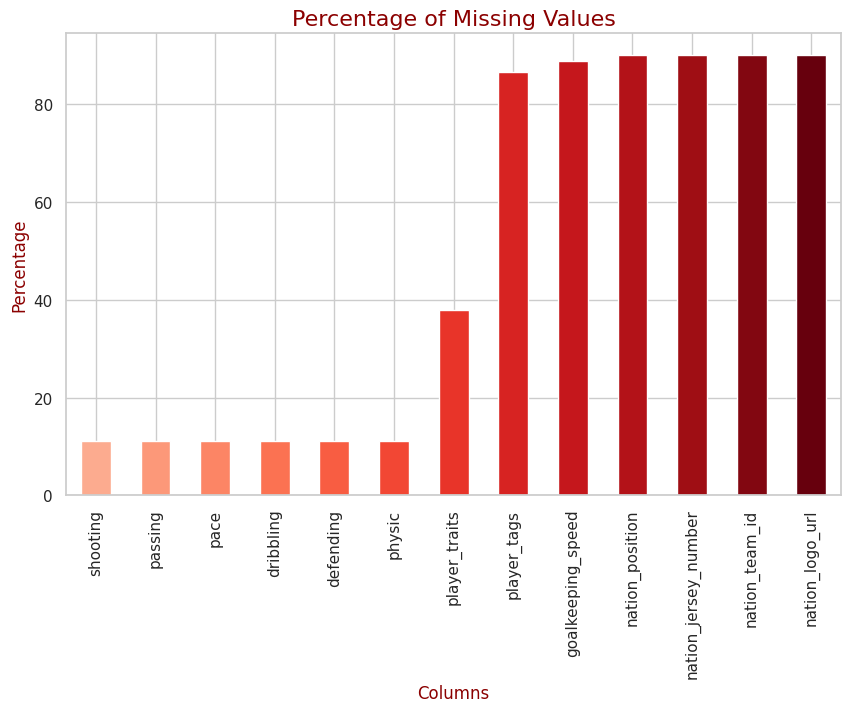

In [71]:
# Plot the percentage of missing values
missing = df.isnull().mean() * 100
missing = missing[missing > 0].sort_values()
plt.figure(figsize=(10, 6))
colors = plt.cm.Reds(np.linspace(0.3, 1, len(missing)))
missing.plot(kind='bar', color=colors)
plt.title('Percentage of Missing Values', fontsize=16, color='darkred')
plt.xlabel('Columns', fontsize=12, color='darkred')
plt.ylabel('Percentage', fontsize=12, color='darkred')
plt.show()

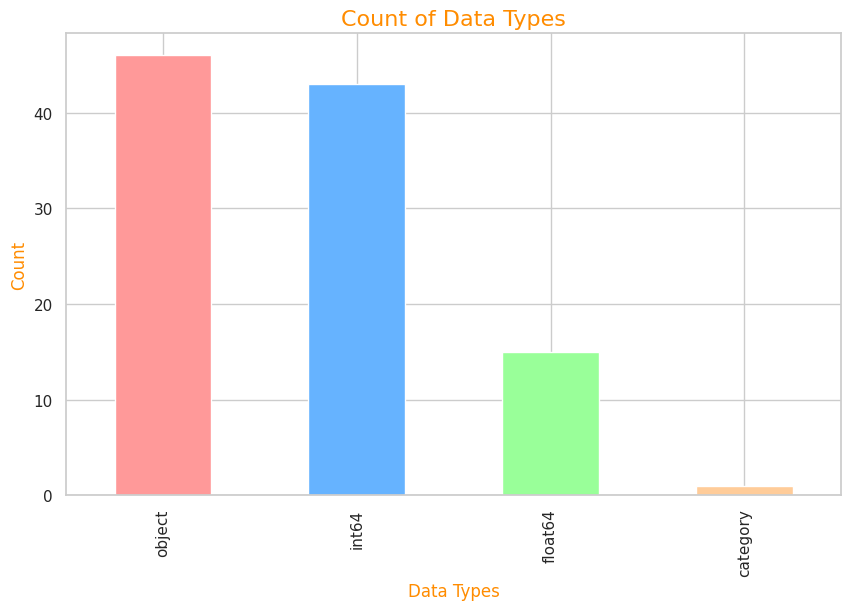

In [72]:
# Plot the count of each data type
plt.figure(figsize=(10, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'pink', 'yellow']
df.dtypes.value_counts().plot(kind='bar', color=colors)
plt.title('Count of Data Types', fontsize=16, color='darkorange')
plt.xlabel('Data Types', fontsize=12, color='darkorange')
plt.ylabel('Count', fontsize=12, color='darkorange')
plt.show()

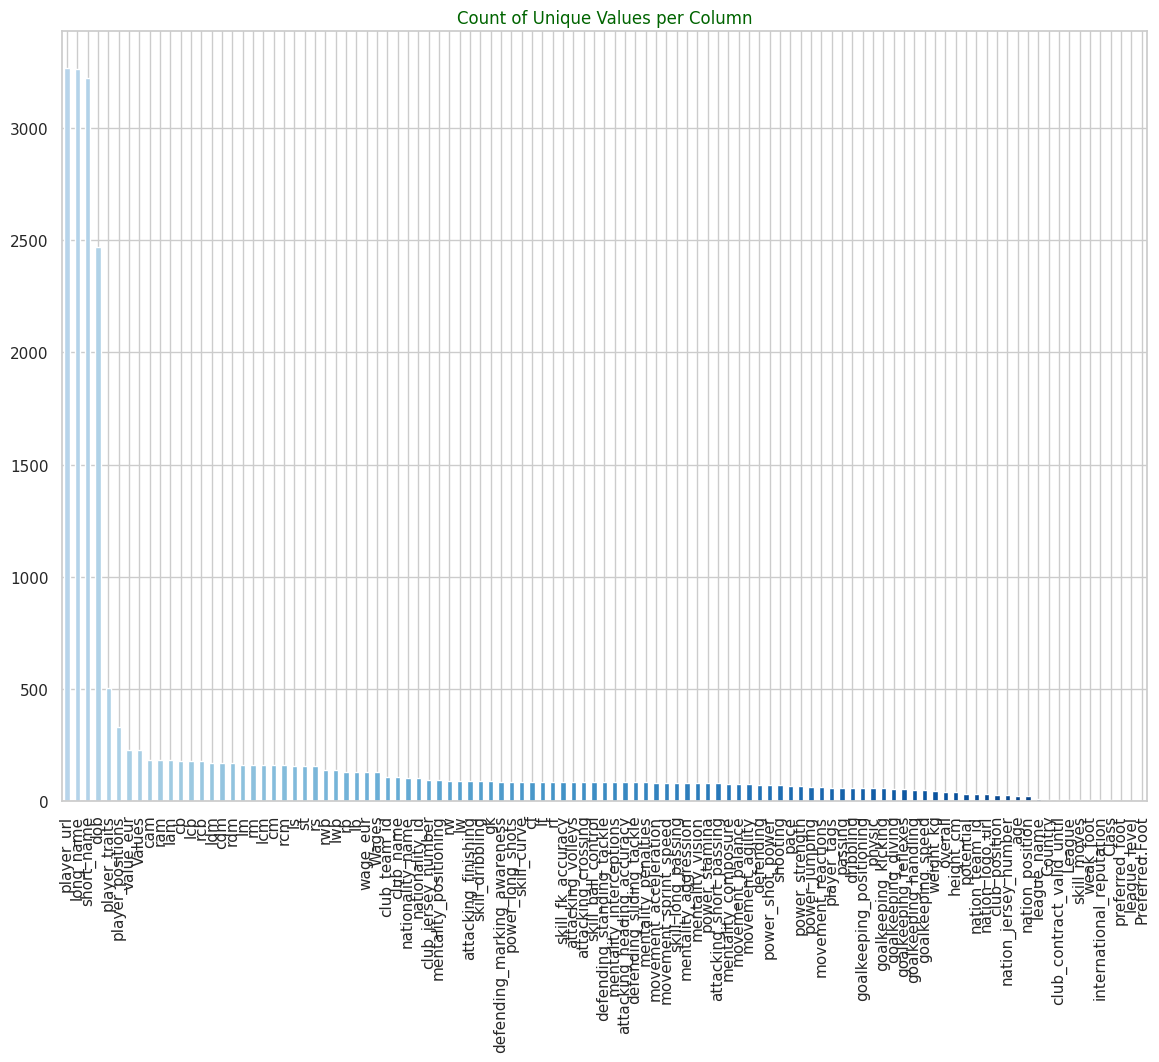

In [73]:
# Plot the count of unique values per column
plt.figure(figsize=(14, 10))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(df.nunique())))
df.nunique().sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Count of Unique Values per Column', fontsize=12, color='darkgreen')
plt.show()

<Figure size 1500x1000 with 0 Axes>

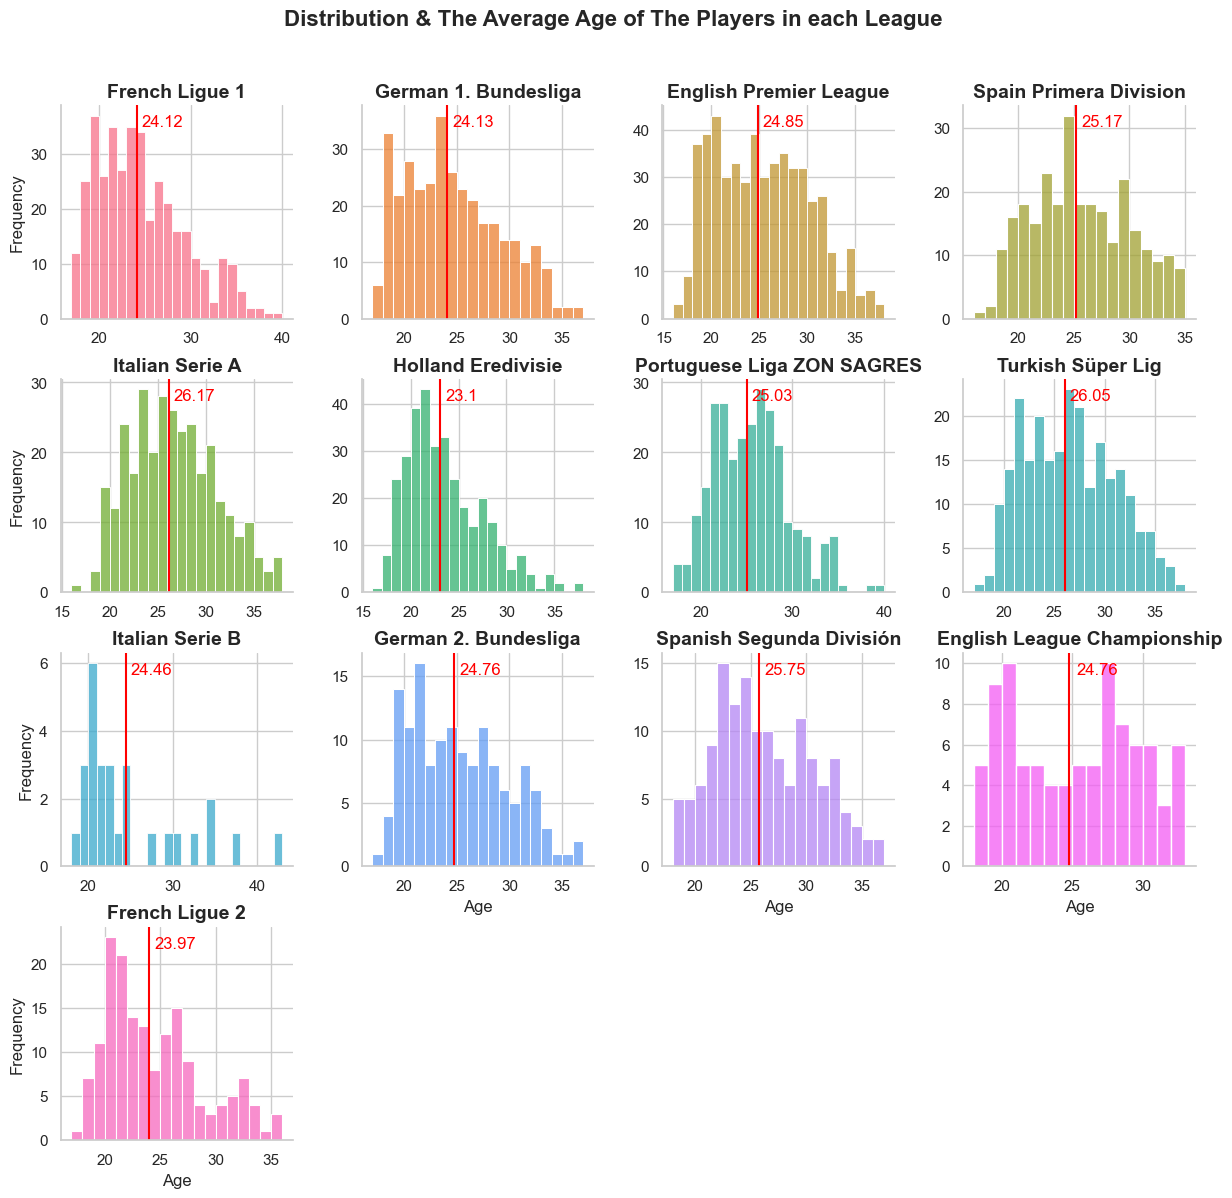

In [74]:
# Calculate the average age by League
summ = df.groupby('league_name').agg({'age': 'mean'}).reset_index()

# Set the size and style of the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Create a color palette for the leagues
leagues = df['league_name'].unique()
palette = sns.color_palette("husl", len(leagues))
colors = dict(zip(leagues, palette))

# Create histograms and draw the average age line for each league
g = sns.FacetGrid(df, col="league_name", col_wrap=4, sharex=False, sharey=False, palette=palette)

# Plot with separate colors for each league
for ax, league_name, color in zip(g.axes.flatten(), leagues, palette):
    subset = df[df['league_name'] == league_name]
    sns.histplot(subset, x='age', ax=ax, binwidth=1, color=color)
    # Draw the average age line
    mean_age = summ[summ['league_name'] == league_name]['age'].values[0]
    ax.axvline(mean_age, color='red', linewidth=1.5)
    ax.text(mean_age + 0.5, ax.get_ylim()[1] * 0.9, round(mean_age, 2), color='red')
    # Bold the titles of the plots
    ax.set_title(league_name, fontsize=14, weight='bold')

# Set the parameters for the plot
g.set_axis_labels("Age", "Frequency")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution & The Average Age of The Players in each League', fontsize=16, weight='bold')
plt.show()

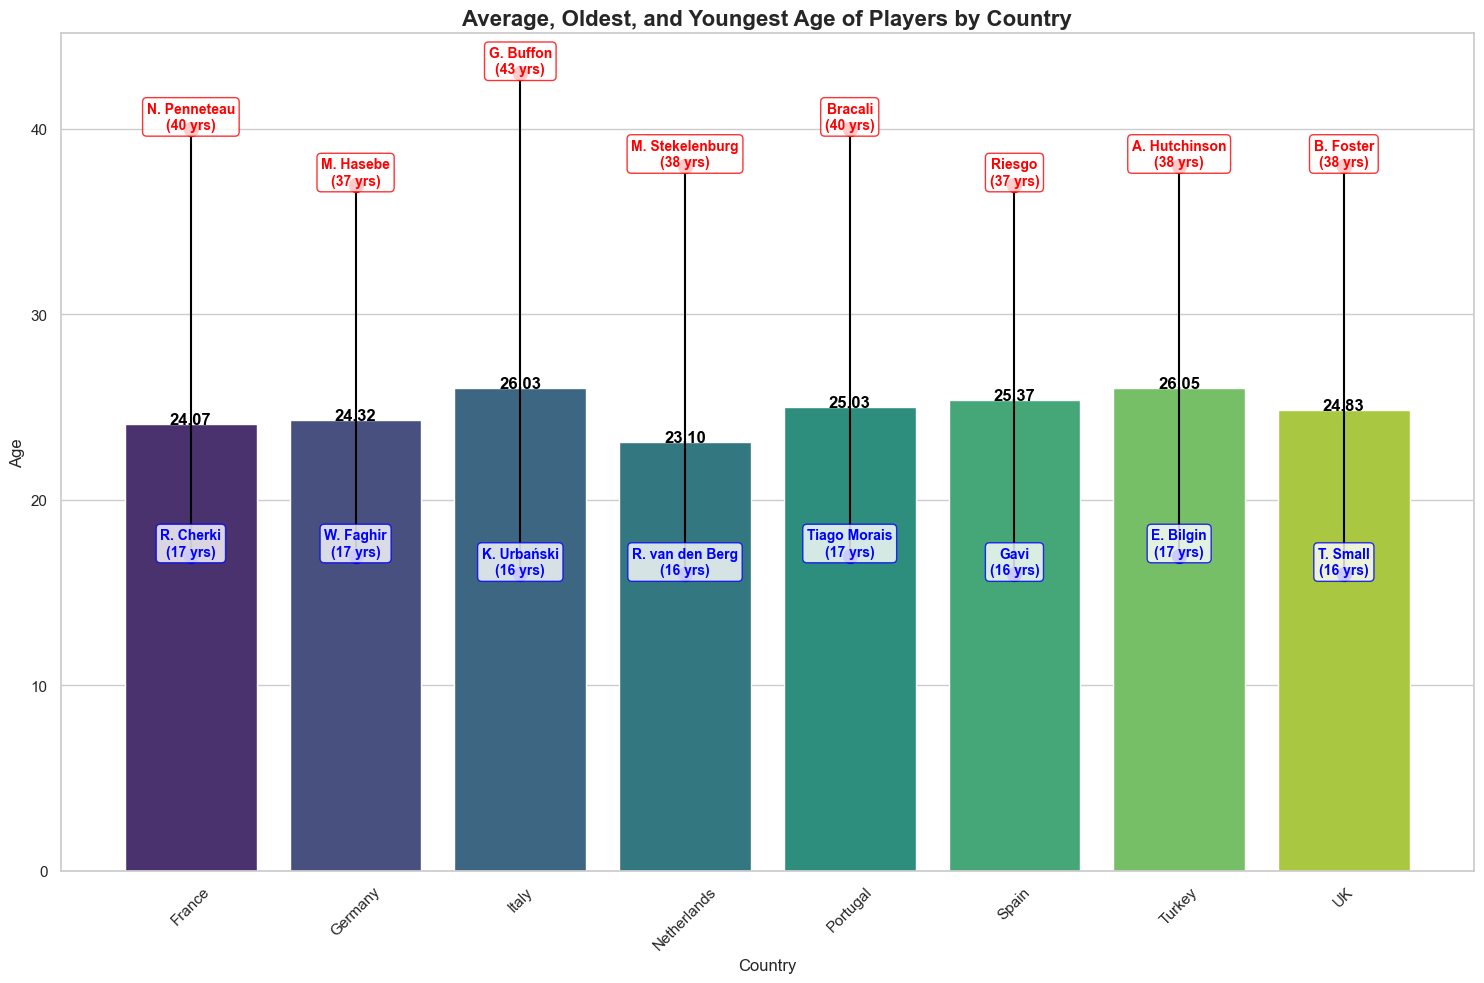

In [75]:
# Calculate statistical metrics
age_stats = df.groupby('Country')['age'].agg(['mean', 'min', 'max']).reset_index()

# Set figure size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Plot the bar chart
barplot = sns.barplot(x='Country', y='mean', data=age_stats, palette='viridis', hue='Country', dodge=False, legend=False)

# Add min and max age lines
for index, row in age_stats.iterrows():
    plt.plot([index, index], [row['min'], row['max']], color='black', linewidth=1.5)
    plt.plot(index, row['min'], 'o', color='blue', markersize=10)
    plt.plot(index, row['max'], 'o', color='red', markersize=10)
    plt.text(index, row['mean'], f'{row["mean"]:.2f}', color='black', ha='center', fontsize=12, weight='bold')

# Highlight oldest and youngest players
for index, country in enumerate(age_stats['Country']):
    subset = df[df['Country'] == country]
    oldest_player = subset.loc[subset['age'].idxmax()]
    youngest_player = subset.loc[subset['age'].idxmin()]
    plt.text(index, oldest_player['age'], f'{oldest_player["short_name"]}\n({oldest_player["age"]} yrs)', 
             color='red', ha='center', fontsize=10, weight='bold', 
             bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.3', alpha=0.8))
    plt.text(index, youngest_player['age'], f'{youngest_player["short_name"]}\n({youngest_player["age"]} yrs)', 
             color='blue', ha='center', fontsize=10, weight='bold', 
             bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3', alpha=0.8))

# Set plot parameters
plt.title('Average, Oldest, and Youngest Age of Players by Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


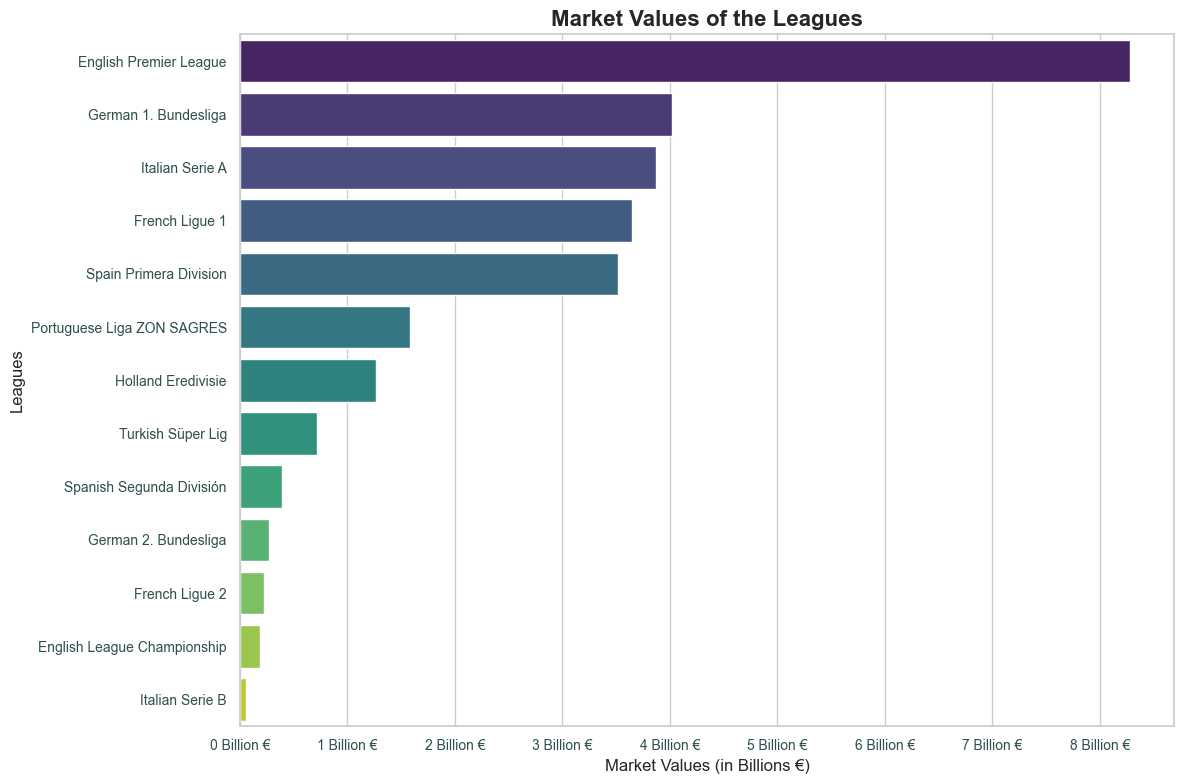

In [76]:
# Clean the data: Remove invalid characters and convert to float type
df['value_eur'] = df['value_eur'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the total market value by League
summ = df.groupby('league_name').agg({'value_eur': 'sum'}).reset_index()

# Set figure size
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot bar chart with different colors for each league
bar_plot = sns.barplot(
    x='value_eur', 
    y='league_name', 
    hue='league_name', 
    data=summ.sort_values('value_eur', ascending=False), 
    palette='viridis', 
    dodge=False, 
    legend=False
)

# Set chart parameters
bar_plot.set_xlabel('Market Values (in Billions €)', fontsize=12)
bar_plot.set_ylabel('Leagues', fontsize=12)
bar_plot.set_title('Market Values of the Leagues', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} Billion €".format(x / 1e9)))

# Apply theme style
plt.xticks(color='darkslategray', fontsize=10)
plt.yticks(color='darkslategray', fontsize=10)
bar_plot.xaxis.grid(True)
bar_plot.yaxis.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


In [77]:
# Clean the data: Remove invalid characters and convert to float type
df['value_eur'] = df['value_eur'].replace(r'[\$,]', '', regex=True).astype(float)

# Get the top 3 most valuable teams in each league
grouped_leagues = df.groupby('league_name')
top_teams_list = [group.nlargest(3, 'value_eur') for name, group in grouped_leagues]
top_teams = pd.concat(top_teams_list).reset_index(drop=True)

# Get the top 5 most valuable players from each club
grouped_clubs = df.groupby('club_name')
top_players_list = [group.nlargest(5, 'value_eur') for name, group in grouped_clubs]
top_players = pd.concat(top_players_list).reset_index(drop=True)


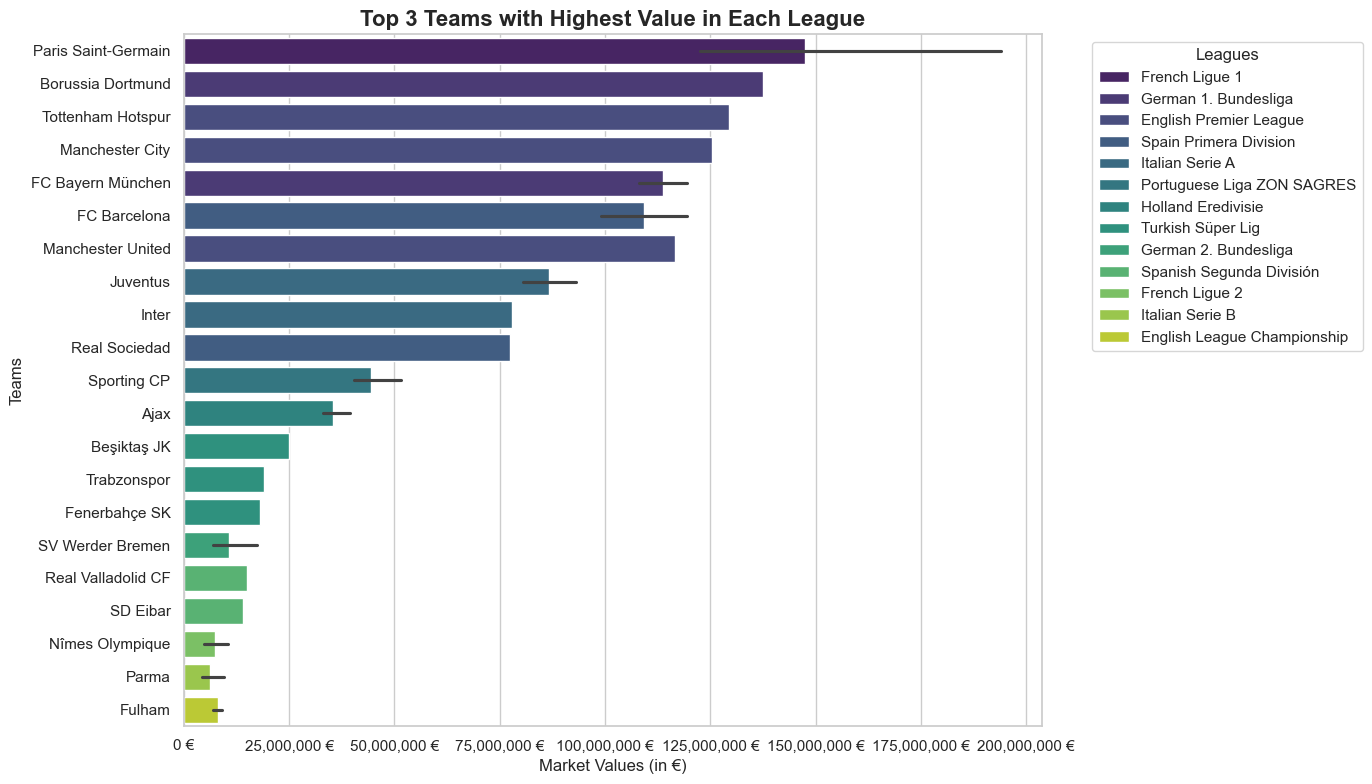

In [78]:
# Set the size and style of the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot the bar chart for the top 3 most valuable teams in each league
bar_plot = sns.barplot(
    x='value_eur', 
    y='club_name', 
    hue='league_name', 
    data=top_teams.sort_values('value_eur', ascending=False), 
    palette='viridis'
)

# Set chart parameters
bar_plot.set_xlabel('Market Values (in €)', fontsize=12)
bar_plot.set_ylabel('Teams', fontsize=12)
bar_plot.set_title('Top 3 Teams with Highest Value in Each League', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} €".format(x)))

plt.legend(title='Leagues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [79]:
# Filter data to include only French Ligue 1, German 1. Bundesliga, and English Premier League
filtered_df = df[df['league_name'].isin(['French Ligue 1', 'German 1. Bundesliga', 'English Premier League'])]

# Get the top 3 most valuable teams in each league
grouped_leagues = filtered_df.groupby('league_name')
top_teams_list = [group.nlargest(3, 'value_eur') for name, group in grouped_leagues if len(group) >= 3]
top_teams = pd.concat(top_teams_list).reset_index(drop=True)

# Get the top 5 most valuable players from each club
grouped_clubs = filtered_df.groupby('club_name')
top_players_list = [group.nlargest(5, 'value_eur') for name, group in grouped_clubs if len(group) >= 5]
top_players = pd.concat(top_players_list).reset_index(drop=True)


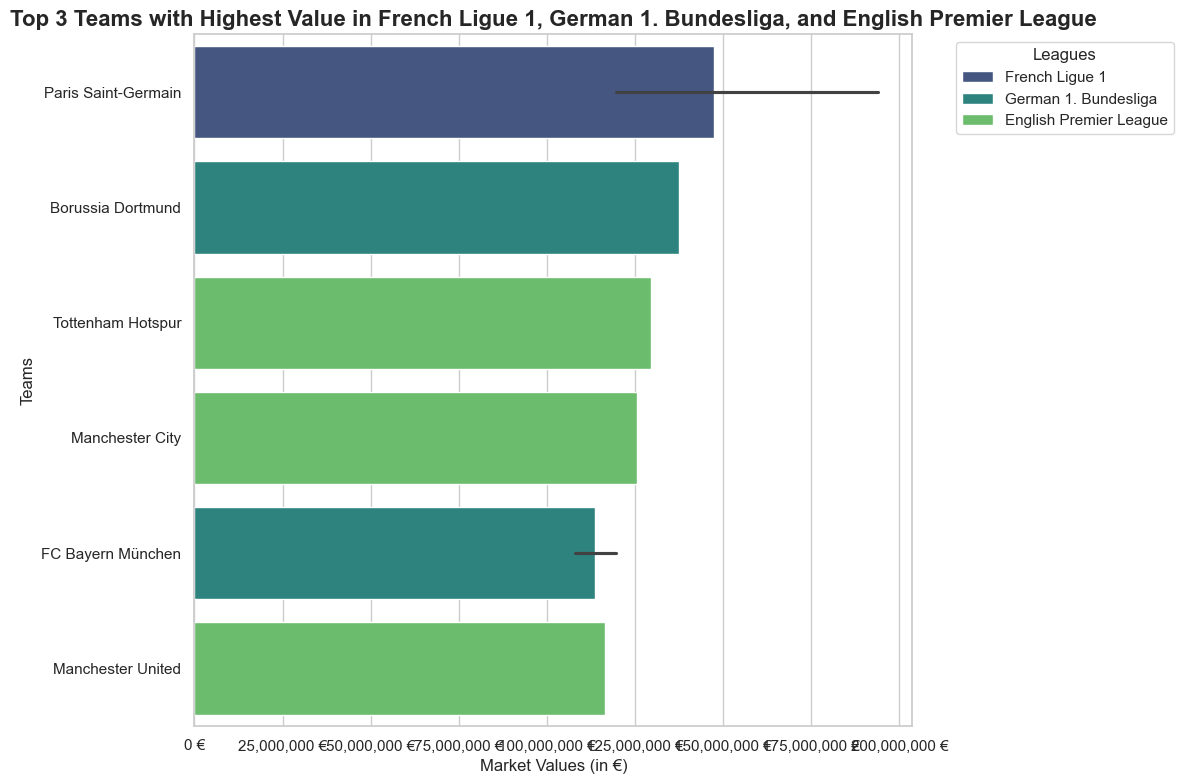

In [80]:
# Set the size and style of the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the bar chart for the top 3 most valuable teams in each league
bar_plot = sns.barplot(
    x='value_eur', 
    y='club_name', 
    hue='league_name', 
    data=top_teams.sort_values('value_eur', ascending=False), 
    dodge=False, 
    palette='viridis'
)

# Set chart parameters
bar_plot.set_xlabel('Market Values (in €)', fontsize=12)
bar_plot.set_ylabel('Teams', fontsize=12)
bar_plot.set_title('Top 3 Teams with Highest Value in French Ligue 1, German 1. Bundesliga, and English Premier League', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} €".format(x)))

plt.legend(title='Leagues', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


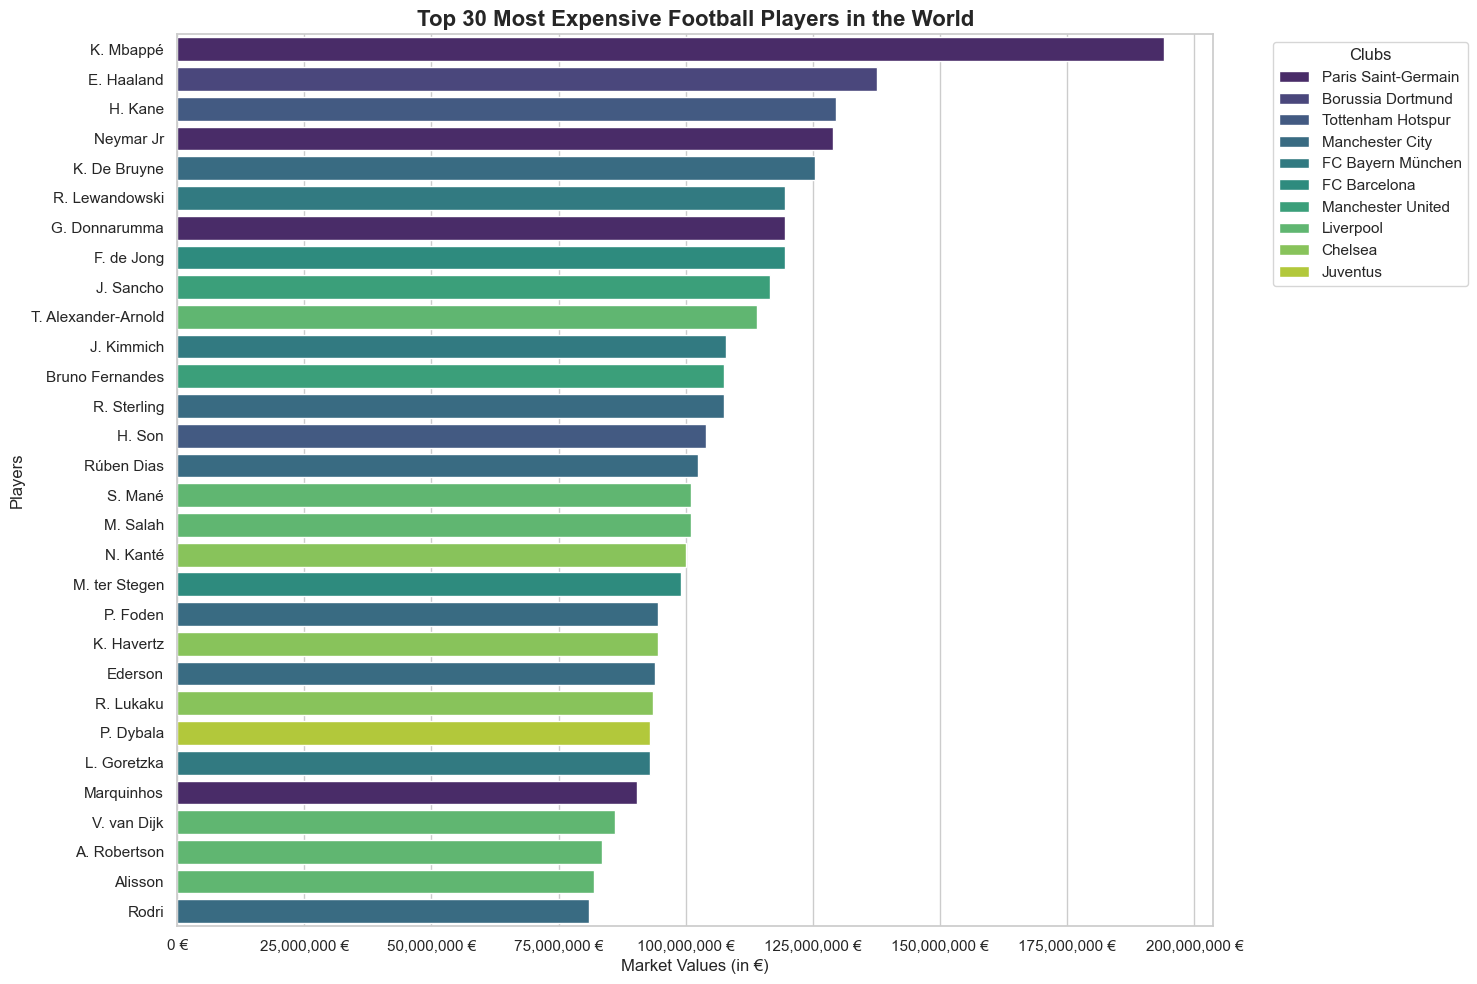

In [81]:
# Assume df is a DataFrame containing existing data
# Filter the top 30 most valuable players
top_30_players = df.sort_values(by='value_eur', ascending=False).head(30)

# Select the necessary columns
top_30_players = top_30_players[['short_name', 'club_name', 'value_eur']]

# Set the size and style of the plot
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Draw the plot for the top 30 most valuable players in the world
bar_plot = sns.barplot(
    x='value_eur', 
    y='short_name', 
    hue='club_name', 
    data=top_30_players, 
    dodge=False, 
    palette='viridis'
)

# Set the parameters for the plot
bar_plot.set_xlabel('Market Values (in €)', fontsize=12)
bar_plot.set_ylabel('Players', fontsize=12)
bar_plot.set_title('Top 30 Most Expensive Football Players in the World', fontsize=16, weight='bold')
bar_plot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f} €".format(x)))

plt.legend(title='Clubs', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


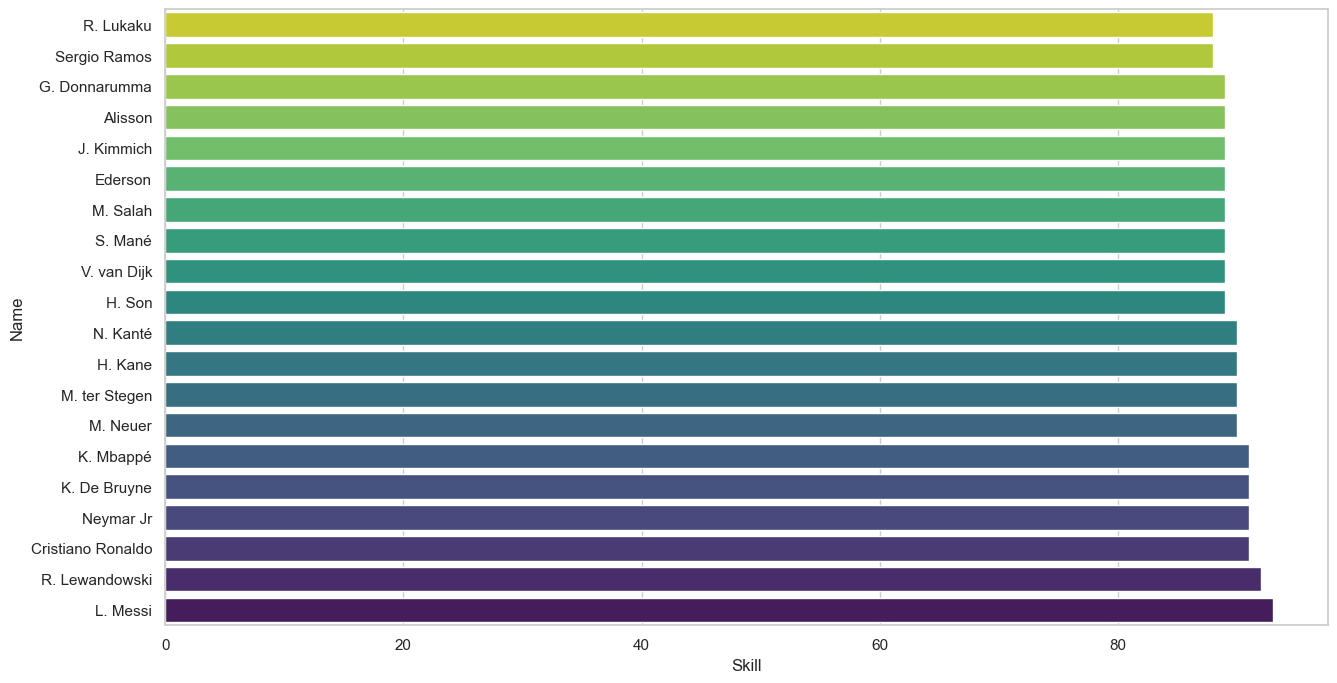

In [82]:
# Convert the relevant columns
df['Skill'] = df['overall']  # Assuming 'overall' is equivalent to 'Skill'
df['Exp'] = df['potential']  # Assuming 'potential' is equivalent to 'Exp'
df['Name'] = df['short_name']  # Assuming 'short_name' is equivalent to 'Name'

# Get the top 20 players with the highest Skill
top_players = df.nlargest(20, 'Skill')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Plot the bar chart with hue set to Name
g = sns.barplot(x='Skill', y='Name', hue='Name', data=top_players, palette='viridis', dodge=False, legend=False)
g.set_xlabel('Skill')
g.set_ylabel('Name')

# Invert the Y axis to display from top to bottom
plt.gca().invert_yaxis()

# Show the plot
plt.show()


In [83]:
# Print the list of player names in the data to check
print(df['long_name'].unique())

# Check the data in the `long_name` column
print(df[['long_name', 'club_name']].head(20))

# Filter the players
players = df[df['long_name'].isin(['Lionel Andrés Messi Cuccittini',
    'Robert Lewandowski',
    'Cristiano Ronaldo dos Santos Aveiro'])].copy()

# Combine name and club
players['Name'] = players['long_name'] + ', ' + players['club_name']

# Select the players' skills
skills_columns = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 
    'defending_standing_tackle', 'defending_sliding_tackle'
]
players = players[['Name'] + skills_columns]

# Correct punctuation in column names
players.columns = players.columns.str.replace(r'[^\w\s]', ' ', regex=True)

# Convert variables to observations
players = players.melt(id_vars=['Name'], var_name='Skill', value_name='Exp')

# Display the result
print(players.head(10))


['Lionel Andrés Messi Cuccittini' 'Robert Lewandowski'
 'Cristiano Ronaldo dos Santos Aveiro' ... 'Manuel Nazaretian'
 'Pascal Juan Estrada' 'Oliver Webber']
                              long_name            club_name
0        Lionel Andrés Messi Cuccittini  Paris Saint-Germain
1                    Robert Lewandowski    FC Bayern München
2   Cristiano Ronaldo dos Santos Aveiro    Manchester United
3         Neymar da Silva Santos Júnior  Paris Saint-Germain
4                       Kevin De Bruyne      Manchester City
6                  Kylian Mbappé Lottin  Paris Saint-Germain
7                    Manuel Peter Neuer    FC Bayern München
8                 Marc-André ter Stegen         FC Barcelona
9                            Harry Kane    Tottenham Hotspur
10                         N'Golo Kanté              Chelsea
13                              손흥민 孙兴慜    Tottenham Hotspur
15                      Virgil van Dijk            Liverpool
16                           Sadio Mané          

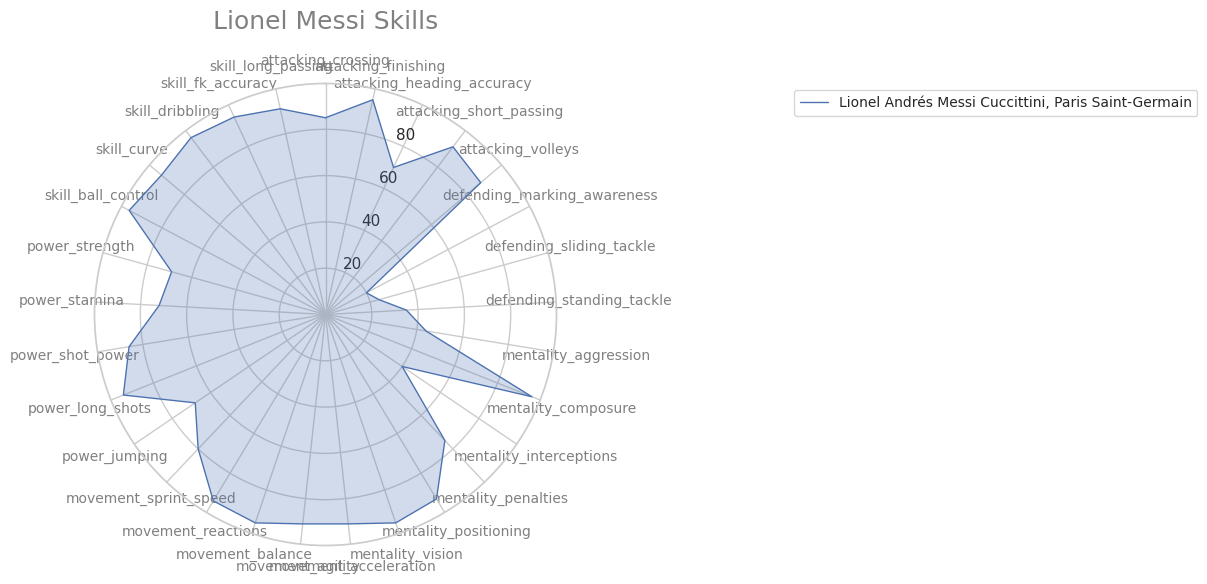

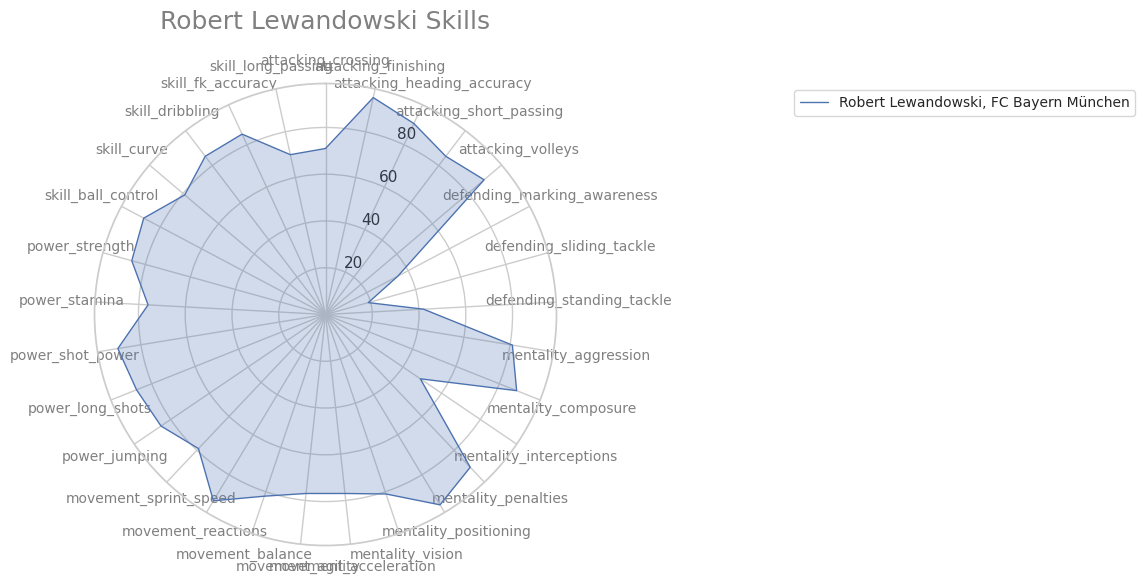

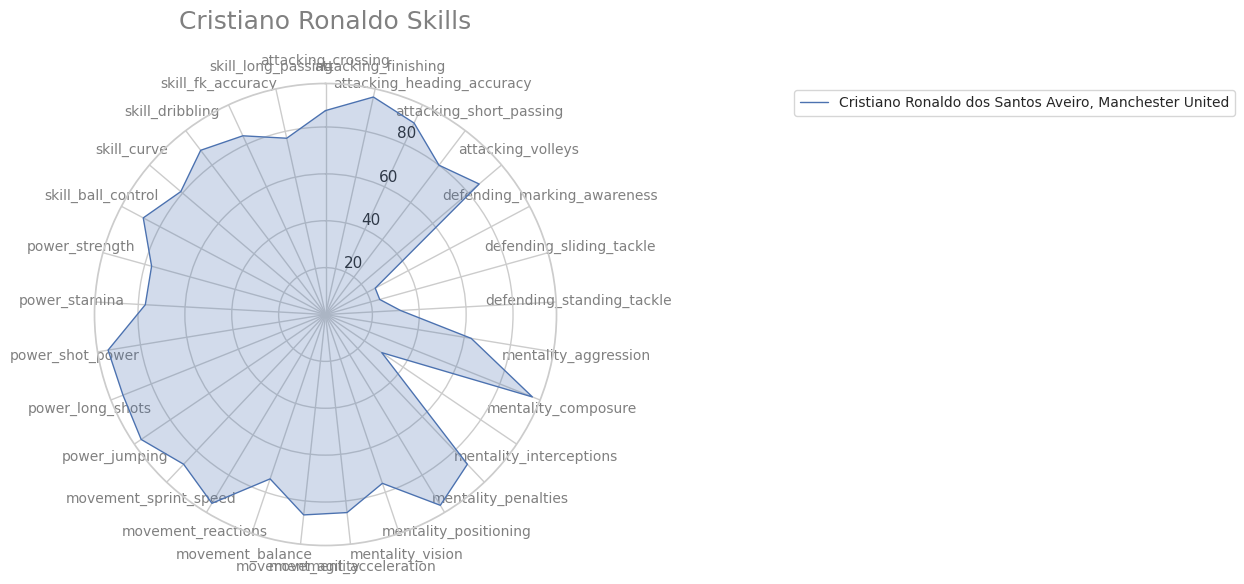

In [116]:
# Filter data for each player
messi = players[players['Name'].str.contains('Messi')]
lewandowski = players[players['Name'].str.contains('Lewandowski')]
ronaldo = players[players['Name'].str.contains('Ronaldo')]

# Pivot the data
messi_skills = messi.pivot(index='Skill', columns='Name', values='Exp').reset_index()
lewandowski_skills = lewandowski.pivot(index='Skill', columns='Name', values='Exp').reset_index()
ronaldo_skills = ronaldo.pivot(index='Skill', columns='Name', values='Exp').reset_index()

# Create radar chart function with custom font sizes and better layout
def create_radar_chart(df, title, ax):
    categories = list(df['Skill'])
    labels = list(df.columns[1:])
    num_vars = len(categories)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='grey', size=10)  # Adjusting size of skill labels

    for label in labels:
        values = df[label].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=label)
        ax.fill(angles, values, alpha=0.25)

    plt.title(title, size=18, color='grey', y=1.1)  # Adjusting title size
    plt.legend(loc='upper left', bbox_to_anchor=(1.5, 1), fontsize=10)  # Adjusting legend font size

# Plot each player's skills with custom font size
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
create_radar_chart(messi_skills, 'Lionel Messi Skills', ax)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
create_radar_chart(lewandowski_skills, 'Robert Lewandowski Skills', ax)
plt.show()

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
create_radar_chart(ronaldo_skills, 'Cristiano Ronaldo Skills', ax)
plt.show()



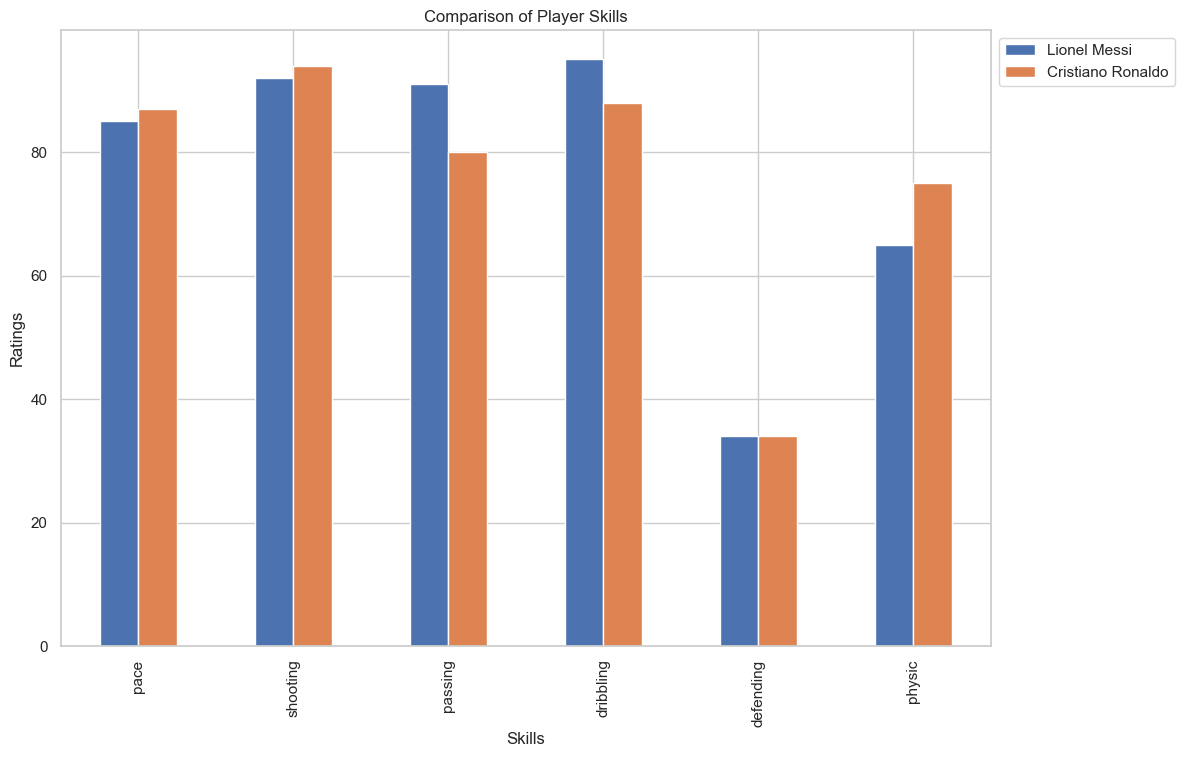

In [85]:
# Filter data for two specific players
player1 = df[df['short_name'] == 'L. Messi']
player2 = df[df['short_name'] == 'Cristiano Ronaldo']

# Choose skills to compare
skills = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

# Check if both players have complete skill data
if player1.empty or player2.empty:
    print("One of the players is not in the dataset.")
else:
    player1_stats = player1[skills].values.flatten()
    player2_stats = player2[skills].values.flatten()
    
    if len(player1_stats) == 0 or len(player2_stats) == 0:
        print("One of the players is missing skill data.")
    else:
        # Create DataFrame for comparison
        comparison_df = pd.DataFrame({
            'Skill': skills,
            'Lionel Messi': player1_stats,
            'Cristiano Ronaldo': player2_stats
        })

        # Create bar chart to compare skills
        comparison_df.plot(x='Skill', kind='bar', figsize=(12, 8))
        plt.title('Comparison of Player Skills')
        plt.xlabel('Skills')
        plt.ylabel('Ratings')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.grid(True)

        # Show plot
        plt.show()


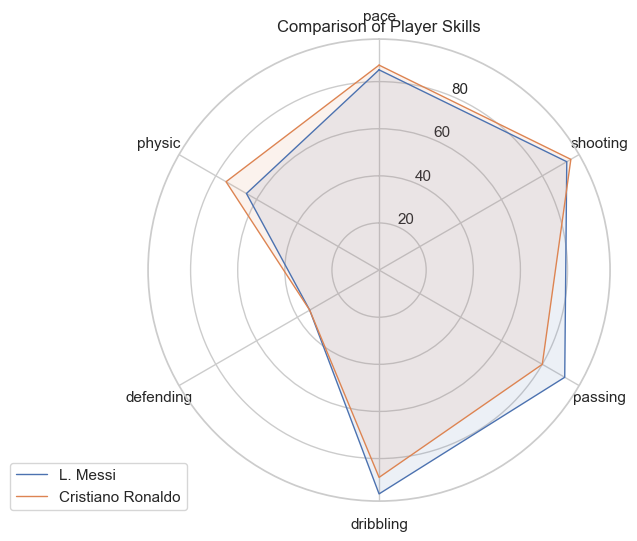

In [86]:
# Extract skill values for each player
player1_stats = player1[skills].values.flatten()
player2_stats = player2[skills].values.flatten()

# Prepare the radar chart
angles = np.linspace(0, 2 * np.pi, len(skills), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Set up radar chart
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(skills)

# Plot player stats on the radar chart
for stats, player_name in zip([player1_stats, player2_stats], ['L. Messi', 'Cristiano Ronaldo']):
    stats = np.concatenate((stats, [stats[0]]))  # Close the loop
    ax.plot(angles, stats, linewidth=1, linestyle='solid', label=player_name)
    ax.fill(angles, stats, alpha=0.1)

# Title and legend
plt.title('Comparison of Player Skills')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show plot
plt.show()


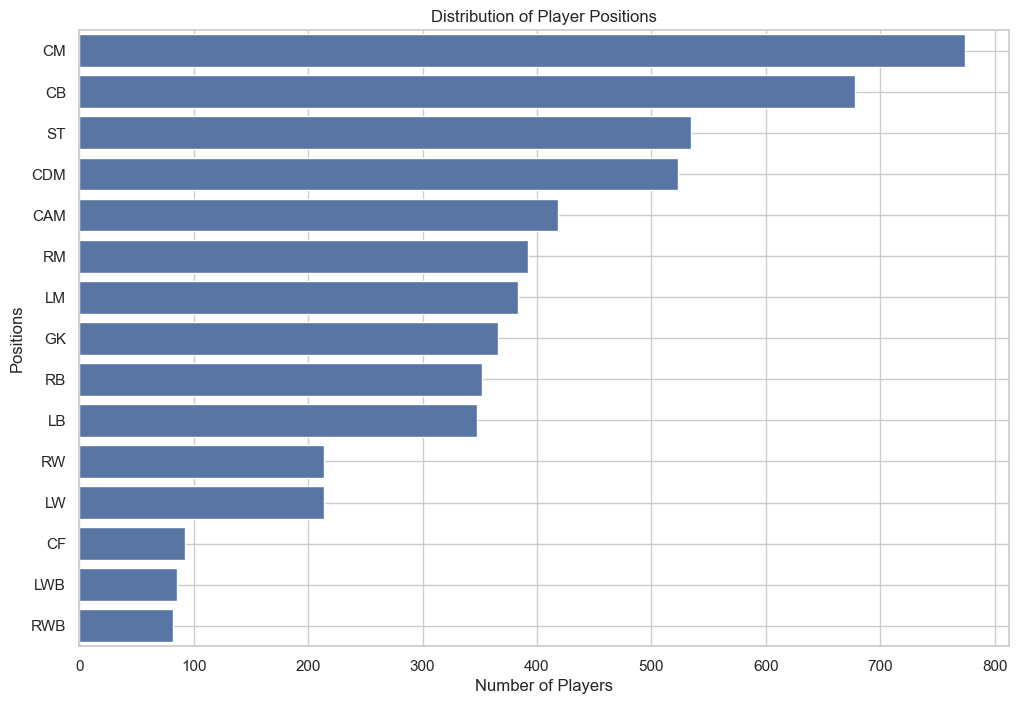

In [87]:
# Convert all values in 'player_positions' to strings (if not already)
df['player_positions'] = df['player_positions'].astype(str)

# Handle NaN or placeholder strings like 'nan'
df['player_positions'] = df['player_positions'].replace('nan', None)

# Split player positions
df['player_positions'] = df['player_positions'].str.split(', ')

# Create a new DataFrame with players and their different positions
positions_df = df.explode('player_positions')

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a frequency plot for positions
sns.countplot(data=positions_df, y='player_positions', 
              order=positions_df['player_positions'].value_counts().index)
plt.title('Distribution of Player Positions')
plt.xlabel('Number of Players')
plt.ylabel('Positions')
plt.grid(True)

# Show the plot
plt.show()

<Figure size 1500x1000 with 0 Axes>

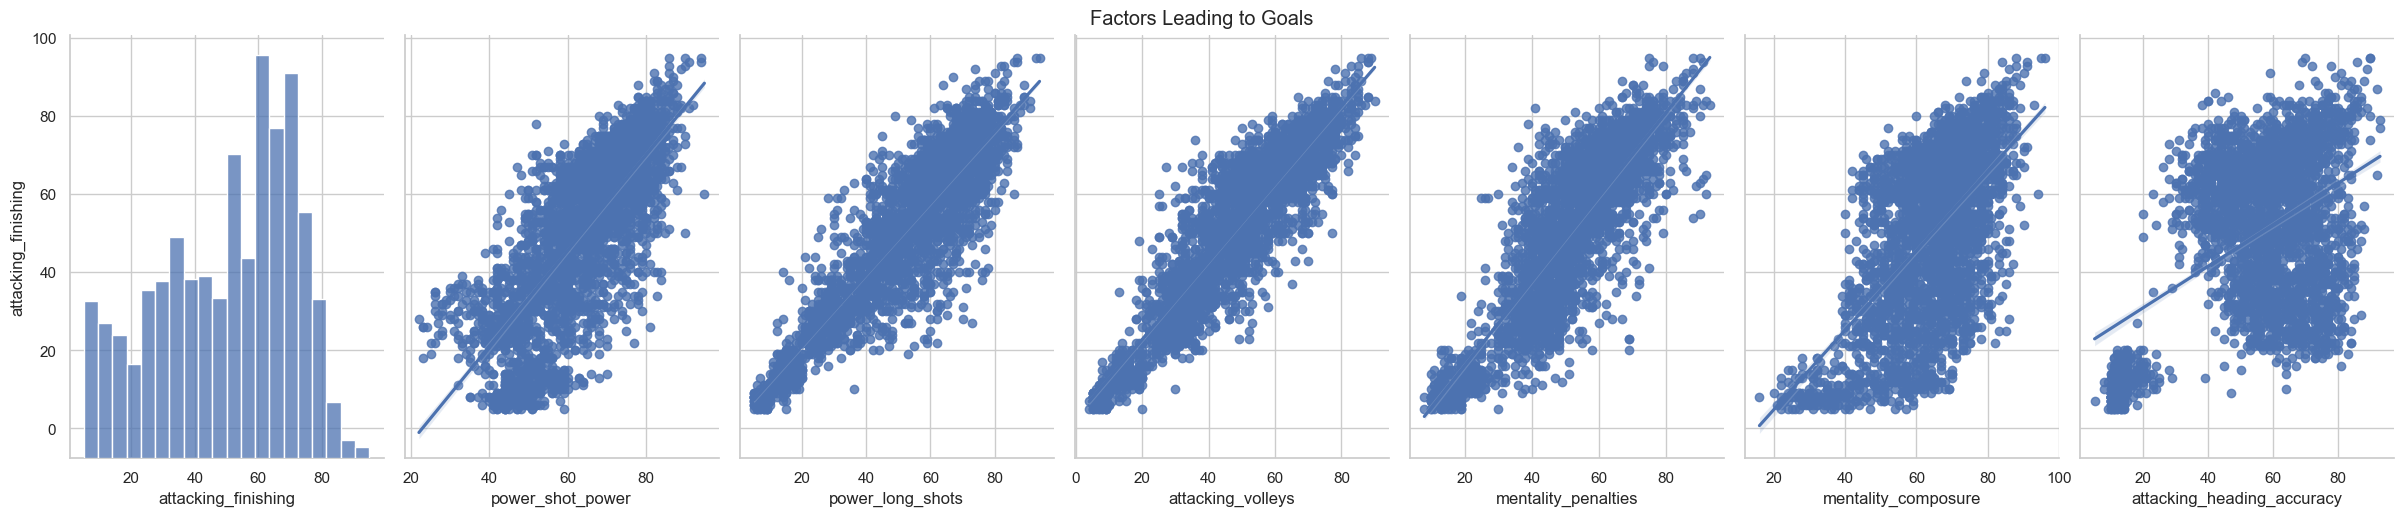

In [88]:
# Select metrics related to scoring
columns_of_interest = [
    'short_name', 'attacking_finishing', 'power_shot_power', 'power_long_shots', 
    'attacking_volleys', 'mentality_penalties', 'mentality_composure', 'attacking_heading_accuracy'
]

# Filter data
df_analysis = df[columns_of_interest]

# Check if there are any missing values
df_analysis = df_analysis.dropna()

# Create visual plots
plt.figure(figsize=(15, 10))

# Create scatter plots for each metric versus finishing ability
sns.pairplot(df_analysis, x_vars=[
    'attacking_finishing', 'power_shot_power', 'power_long_shots', 
    'attacking_volleys', 'mentality_penalties', 'mentality_composure', 'attacking_heading_accuracy'
], y_vars='attacking_finishing', height=5, aspect=0.7, kind='reg')

plt.suptitle('Factors Leading to Goals', y=1.02)
plt.show()


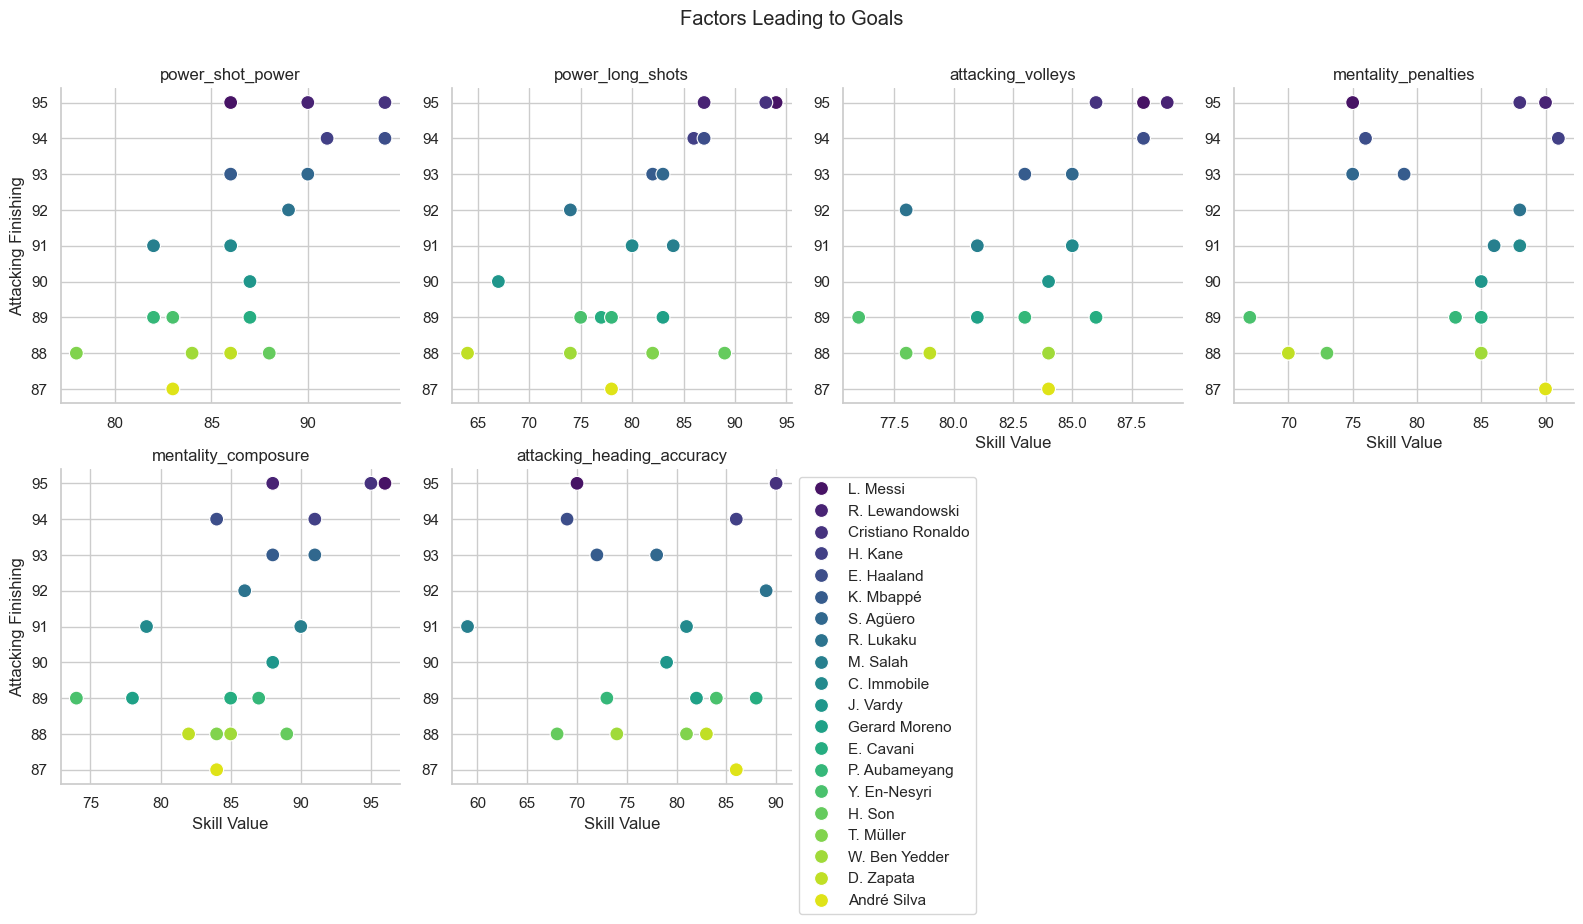

In [89]:
# Select metrics related to scoring
columns_of_interest = [
    'short_name', 'attacking_finishing', 'power_shot_power', 'power_long_shots', 
    'attacking_volleys', 'mentality_penalties', 'mentality_composure', 'attacking_heading_accuracy'
]

# Filter data
df_analysis = df[columns_of_interest]

# Select the top 20 players with the highest finishing ability
top_players = df_analysis.nlargest(20, 'attacking_finishing')

# Check if there are any missing values
top_players = top_players.dropna()

# Create FacetGrid to place the plots horizontally
g = sns.FacetGrid(
    data=top_players.melt(id_vars=['short_name', 'attacking_finishing'], 
                          value_vars=columns_of_interest[2:]),  # Columns to plot
    col="variable", 
    col_wrap=4,  # Number of columns per row
    height=4, 
    sharex=False, 
    sharey=False
)

# Create scatterplot for each plot
g.map_dataframe(sns.scatterplot, x="value", y="attacking_finishing", hue="short_name", palette="viridis", s=100)

# Add titles and alignment
g.set_titles("{col_name}")
g.set_axis_labels("Skill Value", "Attacking Finishing")
g.fig.suptitle("Factors Leading to Goals", y=1.05)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


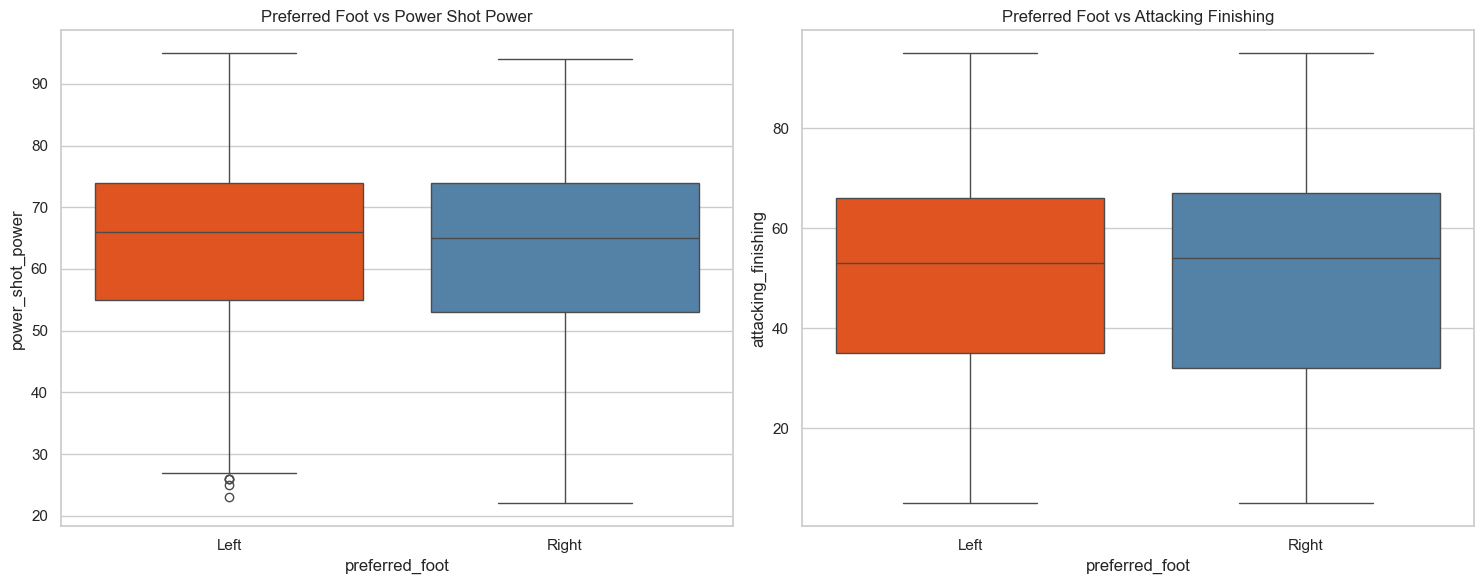

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Chart 1: preferred_foot and power_shot_power
sns.boxplot(
    ax=axes[0],
    x='preferred_foot',
    y='power_shot_power',
    data=df,
    hue='preferred_foot',  # Assign hue to avoid warning
    palette=['orangered', 'steelblue'],
    legend=False  # Disable legend
)
axes[0].set_title('Preferred Foot vs Power Shot Power')

# Chart 2: preferred_foot and attacking_finishing
sns.boxplot(
    ax=axes[1],
    x='preferred_foot',
    y='attacking_finishing',
    data=df,
    hue='preferred_foot',  # Assign hue to avoid warning
    palette=['orangered', 'steelblue'],
    legend=False  # Disable legend
)
axes[1].set_title('Preferred Foot vs Attacking Finishing')

plt.tight_layout()
plt.show()


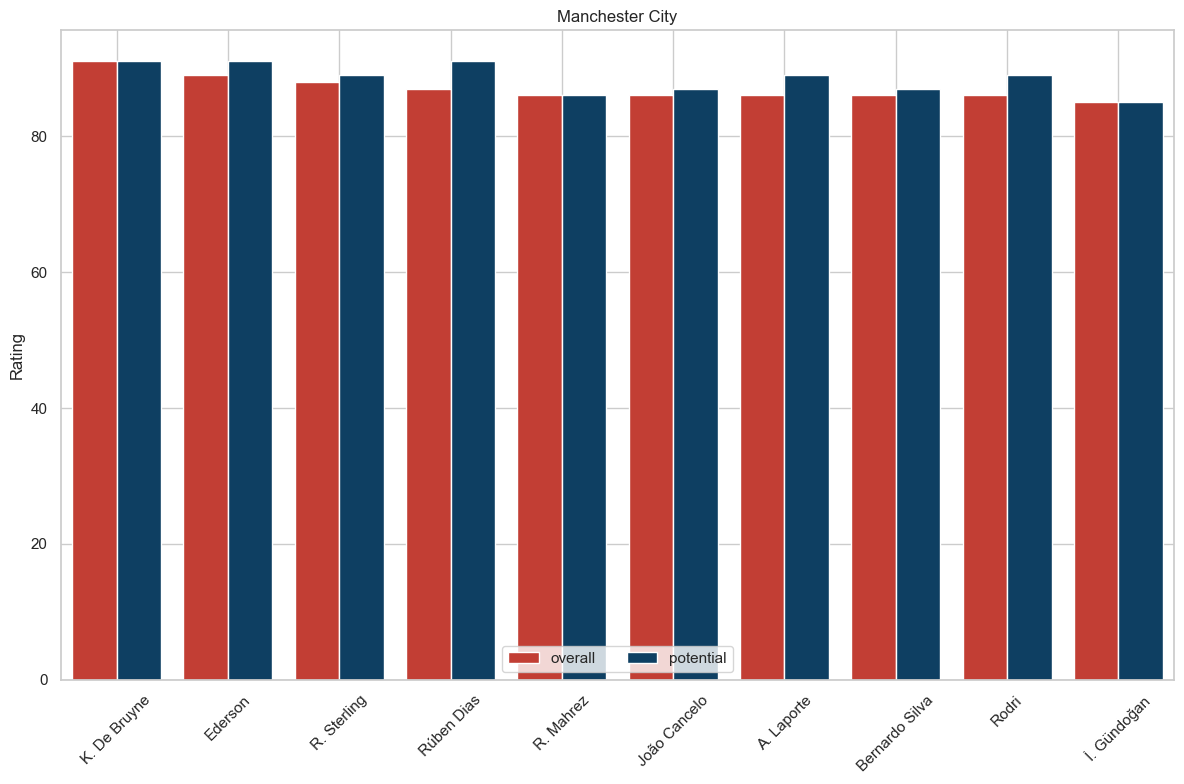

In [91]:
mancity_df = df[df['club_name'] == "Manchester City"]

# Select the columns Name, Overall, Potential and sort by Overall in descending order
mancity_top10 = mancity_df[['short_name', 'overall', 'potential']].sort_values(by='overall', ascending=False).head(10)

# Reshape data from wide to long format
mancity_long = pd.melt(mancity_top10, id_vars=['short_name'], value_vars=['overall', 'potential'], var_name='variable', value_name='Exp')

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='short_name', y='Exp', hue='variable', data=mancity_long, palette=["#DA291C", "#004170"])
plt.title('Manchester City')
plt.xlabel(None)
plt.ylabel('Rating')
plt.legend(title=None, loc='lower center', ncol=2)
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


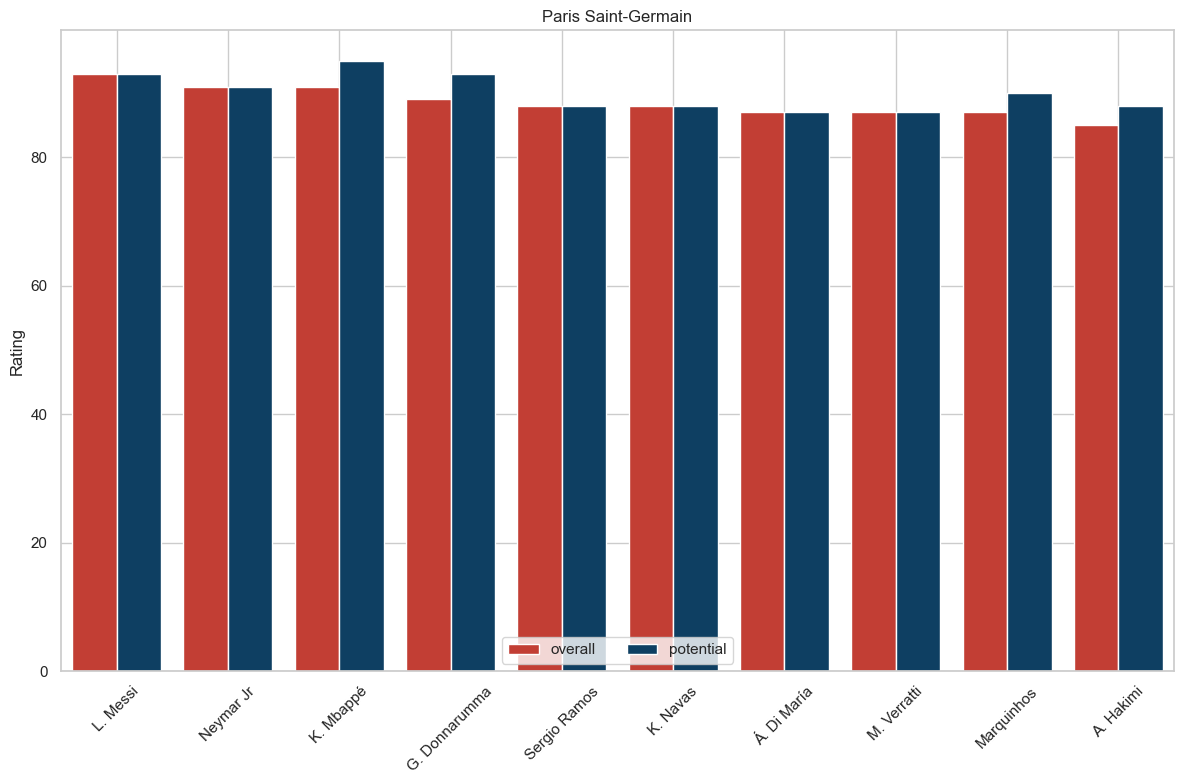

In [92]:
# Filter data for Paris Saint-Germain
psg_df = df[df['club_name'] == "Paris Saint-Germain"]

# Select the columns Name, Overall, Potential and sort by Overall in descending order
psg_top10 = psg_df[['short_name', 'overall', 'potential']].sort_values(by='overall', ascending=False).head(10)

# Reshape data from wide to long format
psg_long = pd.melt(psg_top10, id_vars=['short_name'], value_vars=['overall', 'potential'], var_name='variable', value_name='Exp')

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='short_name', y='Exp', hue='variable', data=psg_long, palette=["#DA291C", "#004170"])
plt.title('Paris Saint-Germain')
plt.xlabel(None)
plt.ylabel('Rating')
plt.legend(title=None, loc='lower center', ncol=2)
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


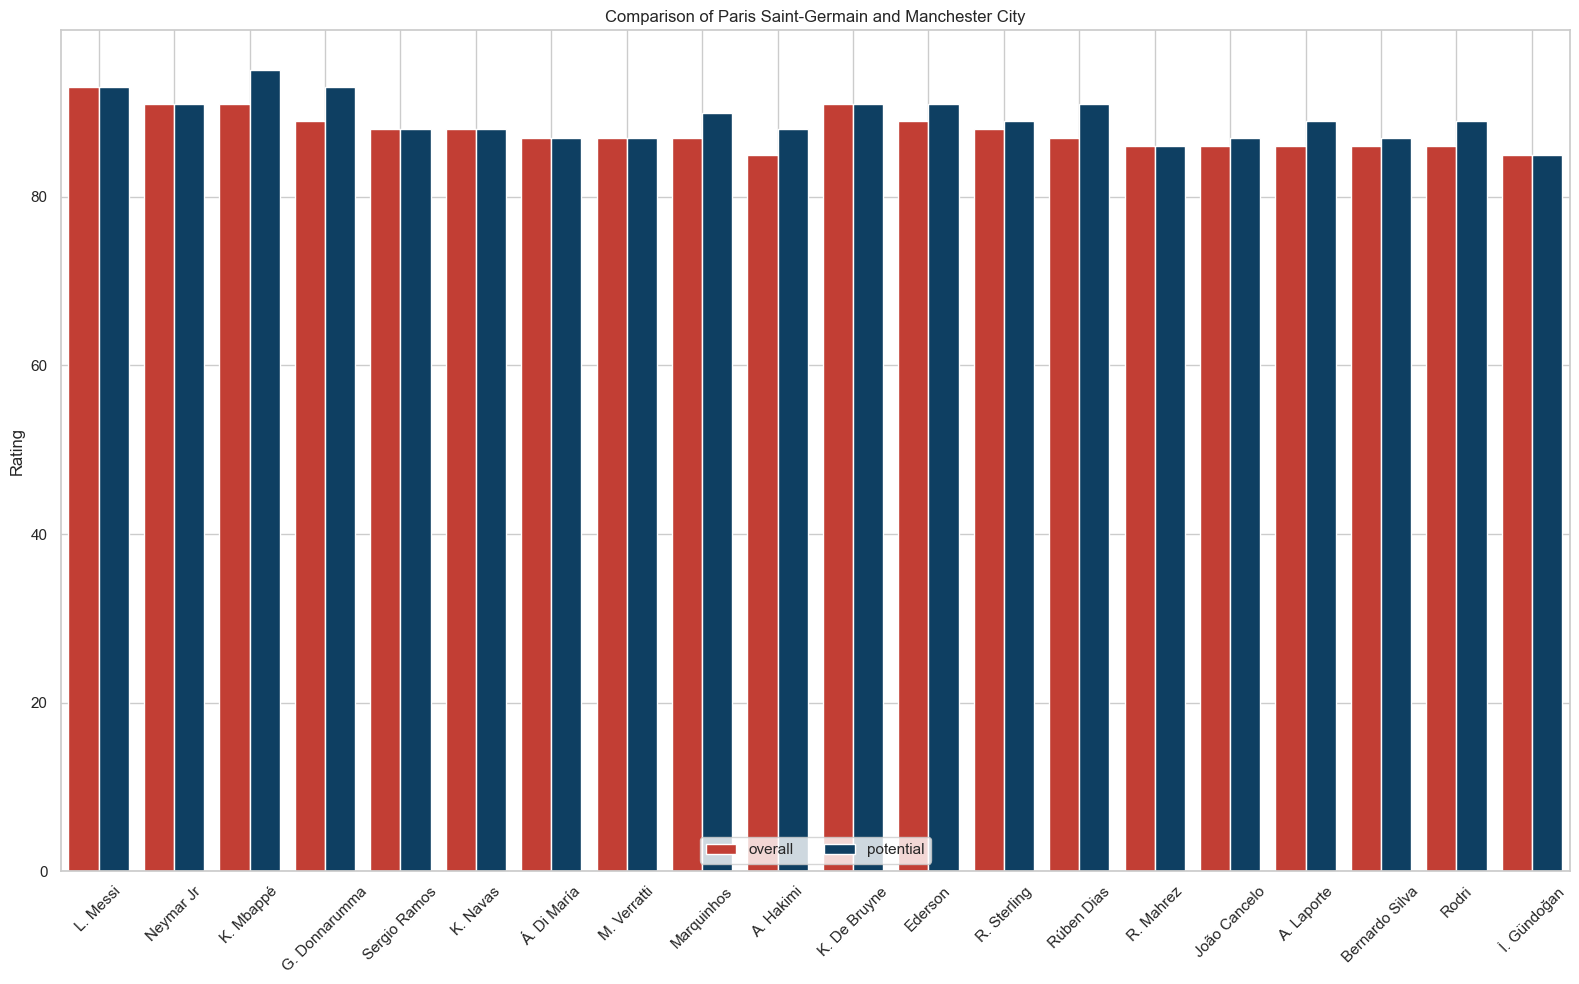

In [93]:
# Add 'club_name' column to identify the club
psg_top10['club_name'] = 'Paris Saint-Germain'
mancity_top10['club_name'] = 'Manchester City'

# Combine the data of the two clubs
combined_df = pd.concat([psg_top10, mancity_top10])

# Reshape data from wide to long format
combined_long = pd.melt(combined_df, id_vars=['short_name', 'club_name'], value_vars=['overall', 'potential'], var_name='variable', value_name='Exp')

# Create bar plot
plt.figure(figsize=(16, 10))
sns.barplot(x='short_name', y='Exp', hue='variable', data=combined_long, palette=["#DA291C", "#004170"])
plt.title('Comparison of Paris Saint-Germain and Manchester City')
plt.xlabel(None)
plt.ylabel('Rating')
plt.legend(title=None, loc='lower center', ncol=2)
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


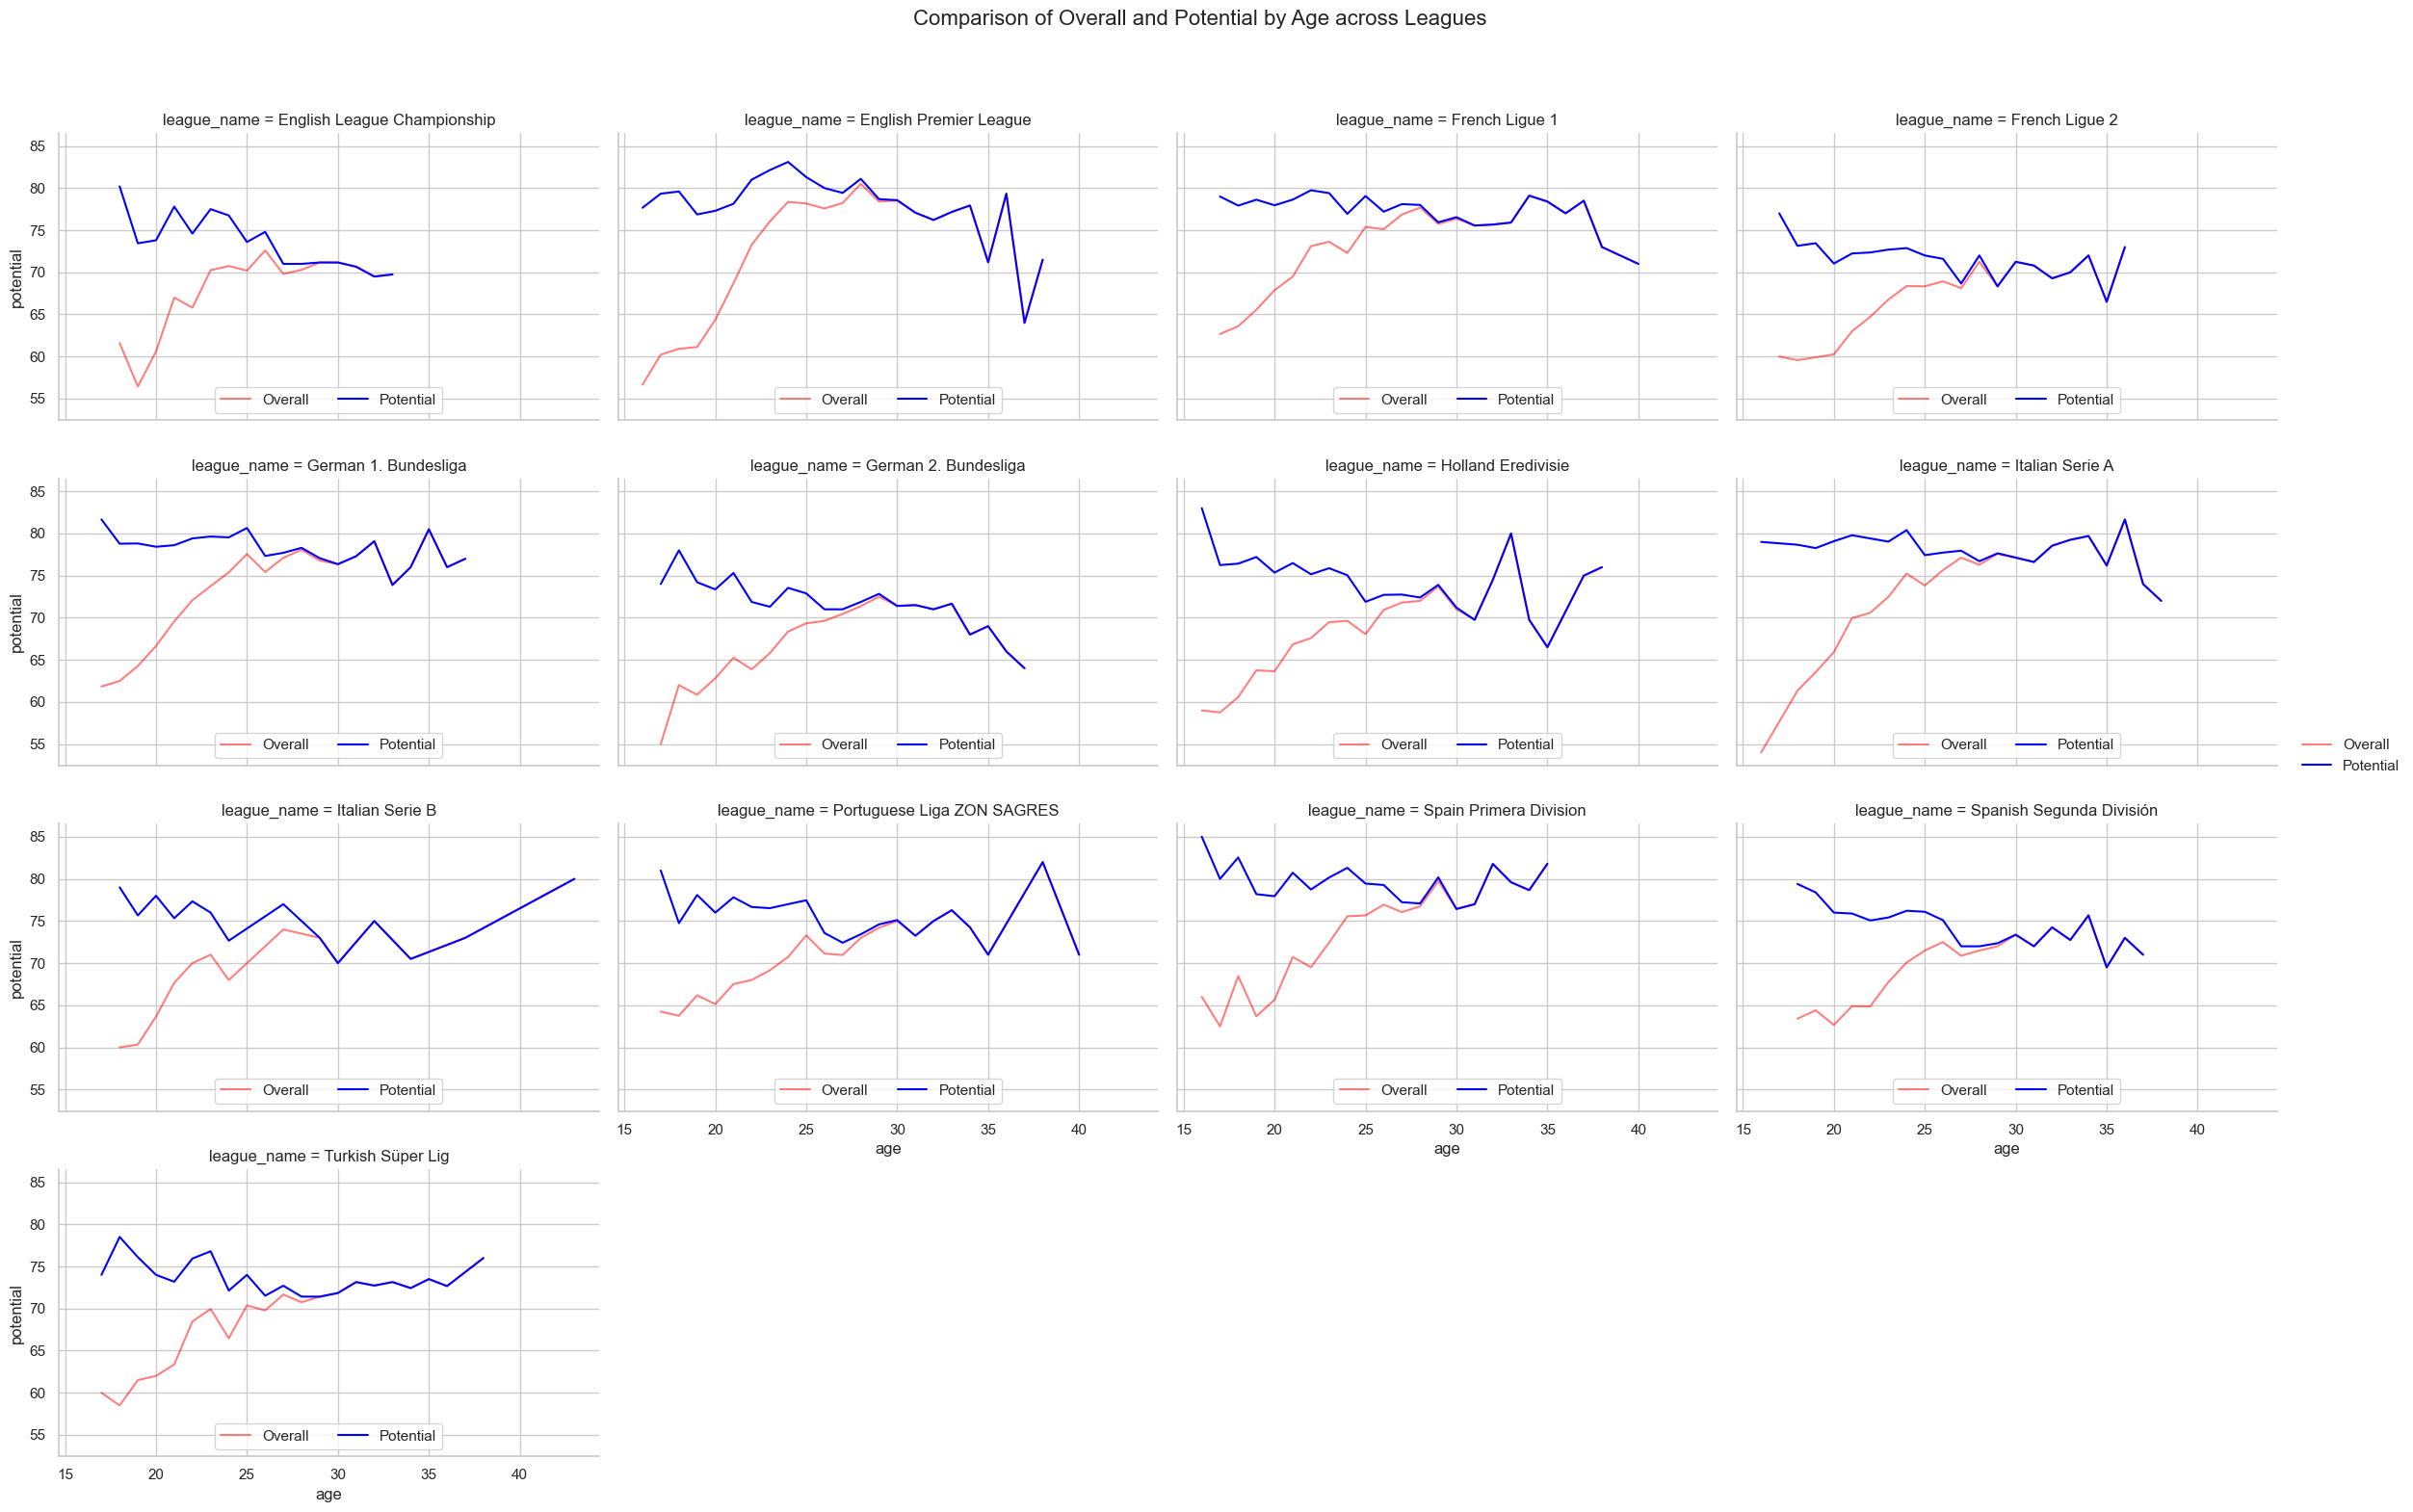

In [94]:
# Calculate the average value of Overall and Potential by League and Age
df_grouped = df.groupby(['league_name', 'age']).agg({'overall': 'mean', 'potential': 'mean'}).reset_index()

# Create line plot
g = sns.FacetGrid(df_grouped, col="league_name", col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, "age", "overall", label="Overall", color="red", alpha=0.5)
g.map(sns.lineplot, "age", "potential", label="Potential", color="blue")

# Customize plot
for ax in g.axes.flat:
    ax.legend(loc='lower center', ncol=2)

g.add_legend(title=None, label_order=["Overall", "Potential"])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of Overall and Potential by Age across Leagues', fontsize=16)

plt.show()


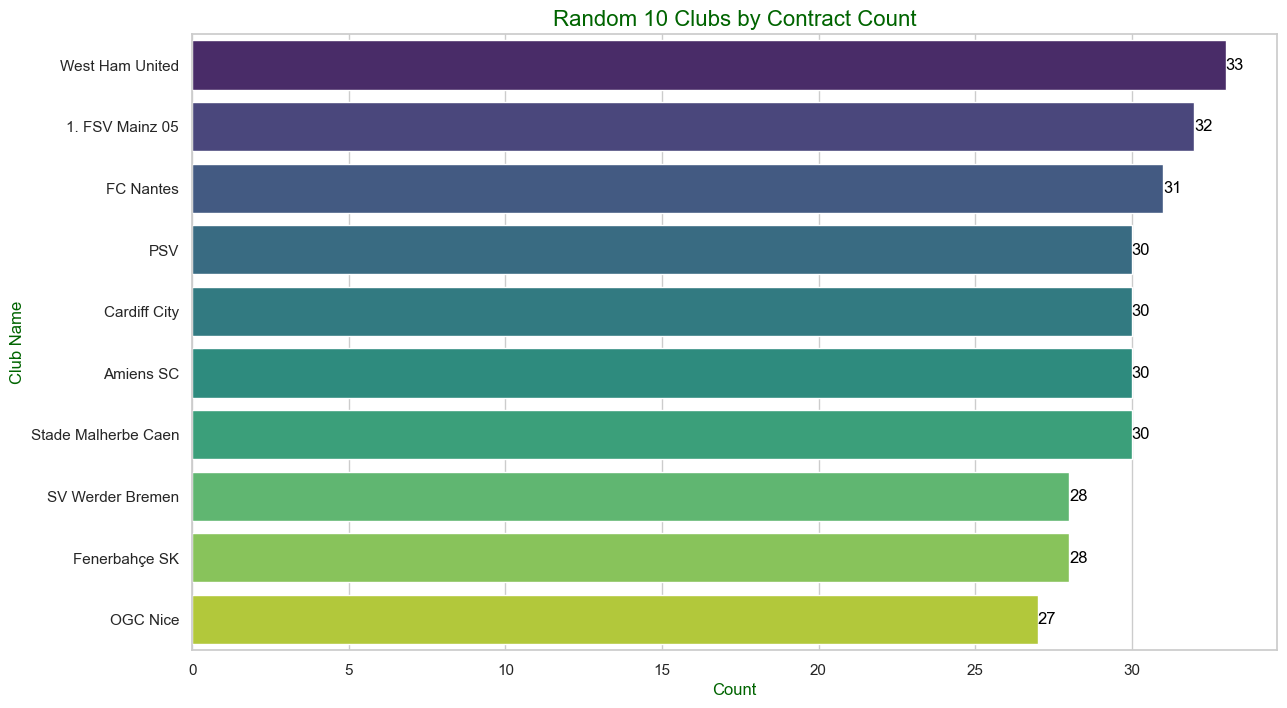

In [95]:
# Get a list of random clubs
random_clubs = df['club_name'].drop_duplicates().sample(10, random_state=1).tolist()

# Filter data to include only the selected random clubs
random_club_data = df[df['club_name'].isin(random_clubs)]

# Create a column to count the number of contracts by club
contract_counts = random_club_data['club_name'].value_counts().reset_index()
contract_counts.columns = ['club_name', 'contract_count']

# Plot the chart
plt.figure(figsize=(14, 8))
sns.barplot(data=contract_counts, x='contract_count', y='club_name', hue='club_name', dodge=False, palette='viridis', legend=False)

plt.title('Random 10 Clubs by Contract Count', fontsize=16, color='darkgreen')
plt.xlabel('Count', fontsize=12, color='darkgreen')
plt.ylabel('Club Name', fontsize=12, color='darkgreen')

# Display contract count values on top of each bar
for index, value in enumerate(contract_counts['contract_count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

plt.show()


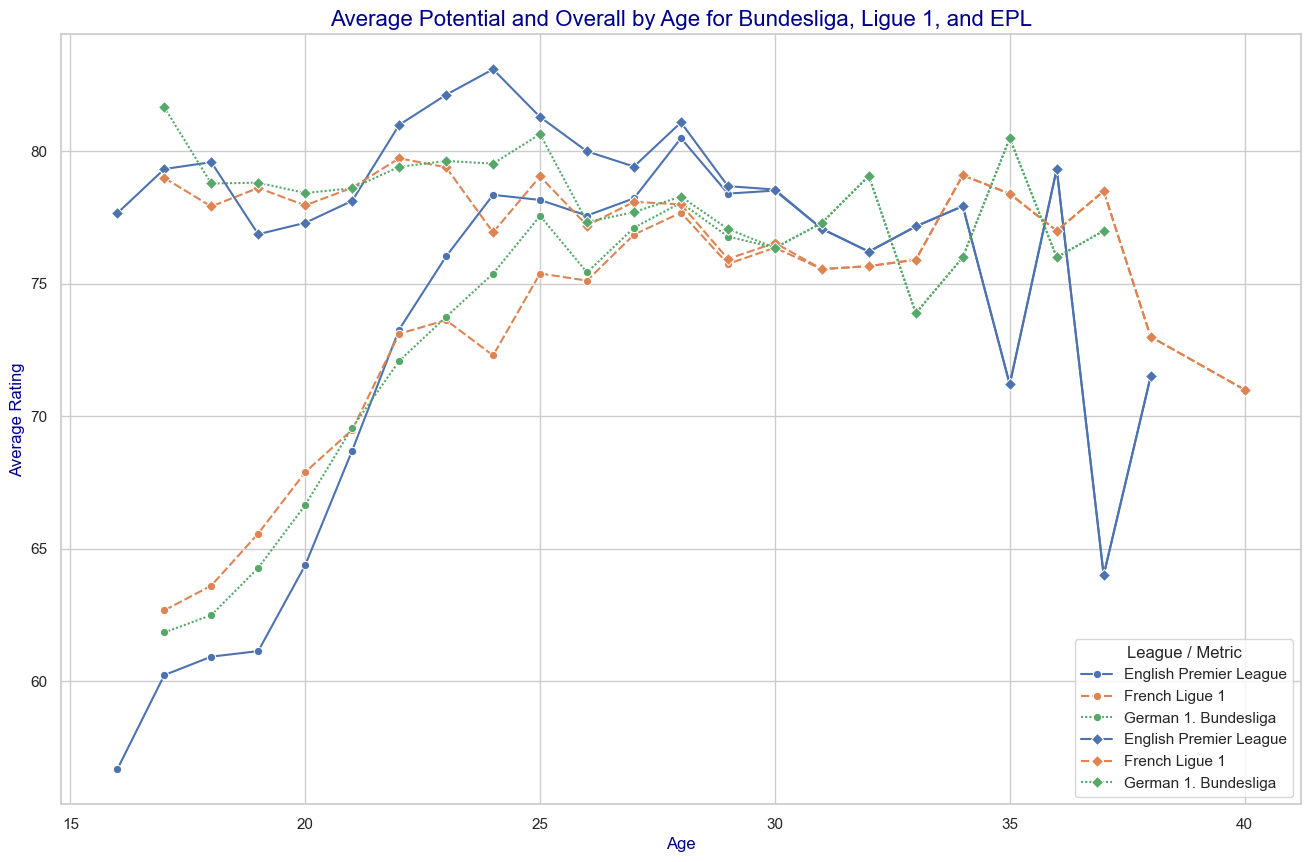

In [96]:
# Calculate the average potential and overall rating by age for each league
age_comparison = filtered_df.groupby(['league_name', 'age'])[['overall', 'potential']].mean().reset_index()

# Plot the data
plt.figure(figsize=(16, 10))
sns.lineplot(data=age_comparison, x='age', y='overall', hue='league_name', marker='o', style='league_name')
sns.lineplot(data=age_comparison, x='age', y='potential', hue='league_name', marker='D', linestyle='--', style='league_name')

plt.title('Average Potential and Overall by Age for Bundesliga, Ligue 1, and EPL', fontsize=16, color='darkblue')
plt.xlabel('Age', fontsize=12, color='darkblue')
plt.ylabel('Average Rating', fontsize=12, color='darkblue')
plt.legend(title='League / Metric')
plt.grid(True)

plt.show()


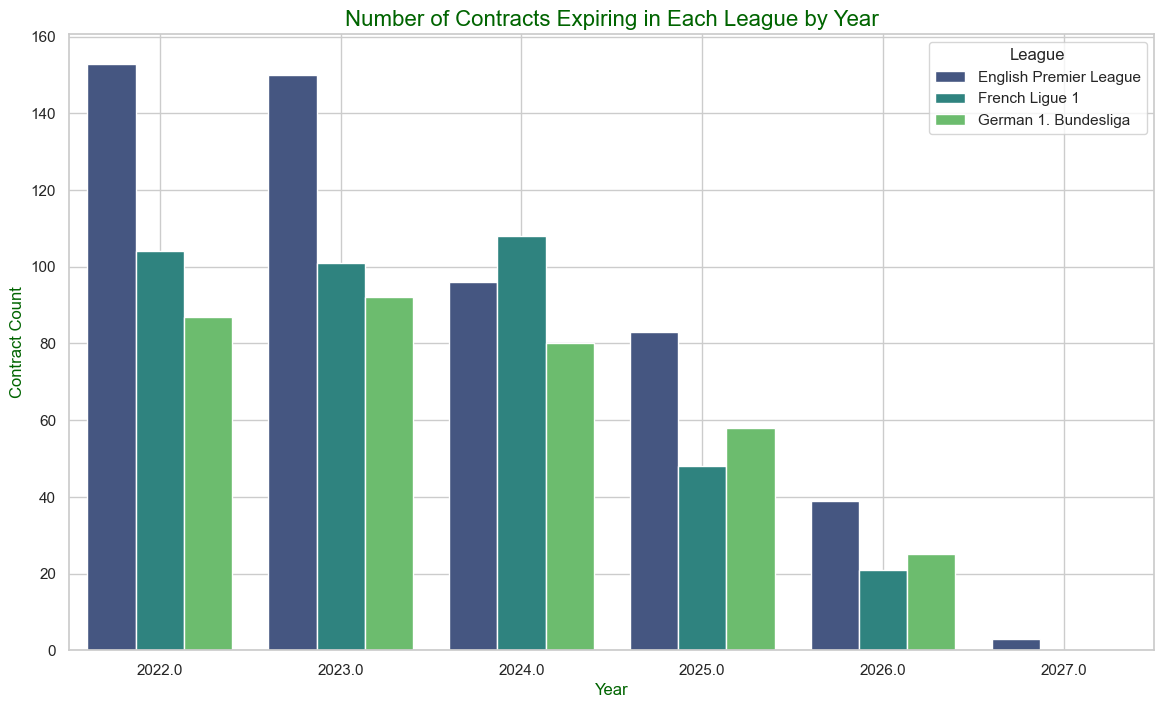

In [97]:
# Calculate the number of expiring contracts by year for each league
contract_expiry = filtered_df.groupby(['league_name', 'club_contract_valid_until']).size().reset_index(name='contract_count')

# Create plot
plt.figure(figsize=(14, 8))
sns.barplot(data=contract_expiry, x='club_contract_valid_until', y='contract_count', hue='league_name', palette='viridis')

plt.title('Number of Contracts Expiring in Each League by Year', fontsize=16, color='darkgreen')
plt.xlabel('Year', fontsize=12, color='darkgreen')
plt.ylabel('Contract Count', fontsize=12, color='darkgreen')
plt.legend(title='League')
plt.grid(True)

plt.show()


In [98]:
df = df[df['Class'] != 'Unknown']

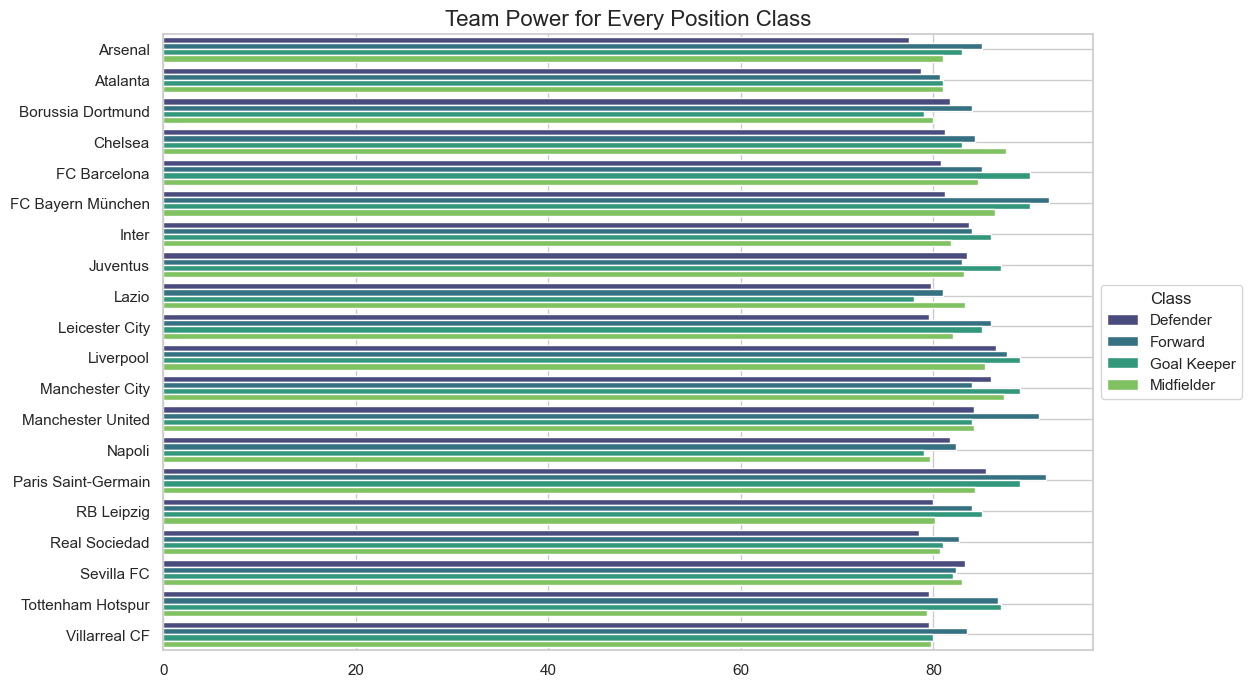

In [99]:
# Calculate the average overall rating for each club and sort in descending order
powerful = df.groupby('club_name').agg(mean_overall=('overall', 'mean')).reset_index().sort_values(by='mean_overall', ascending=False).head(20)

# Calculate the average overall rating for each club and each position class
class_mean = df.groupby(['club_name', 'Class']).agg(mean_overall=('overall', 'mean')).reset_index()

# Filter data to include only the strongest clubs
class_mean_filtered = class_mean[class_mean['club_name'].isin(powerful['club_name'])]

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=class_mean_filtered, x='mean_overall', y='club_name', hue='Class', dodge=True, palette='viridis')

plt.title('Team Power for Every Position Class', fontsize=16)
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Class', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)  # Adjust legend position
plt.grid(True)

plt.show()



In [100]:
positions = ['Goal Keeper', 'Defender', 'Midfielder', 'Forward']

# Find the player with the highest rating in each position
top_players = df.loc[df.groupby('Class')['overall'].idxmax()]

# Convert skill columns to numeric
df[skills] = df[skills].apply(pd.to_numeric, errors='coerce')

# Extract top 4 skills for each player and create a separate table
for index, row in top_players.iterrows():
    player_skills = row[skills].astype(float).nlargest(4).reset_index()
    player_skills.columns = ['Skill', 'Value']
    player_skills['Player'] = row['long_name']
    player_skills['Class'] = row['Class']
    player_skills['Position'] = row['Class']  # Add column for position
    
    # Remove row index by resetting it
    player_skills.reset_index(drop=True, inplace=True)
    
    display(player_skills[['Player', 'Position', 'Skill', 'Value']])

Player  Position      Skill  Value
0  Virgil van Dijk  Defender  defending   91.0
1  Virgil van Dijk  Defender     physic   84.0
2  Virgil van Dijk  Defender       pace   78.0
3  Virgil van Dijk  Defender  dribbling   72.0

Player Position      Skill  Value
0  Lionel Andrés Messi Cuccittini  Forward  dribbling   95.0
1  Lionel Andrés Messi Cuccittini  Forward   shooting   92.0
2  Lionel Andrés Messi Cuccittini  Forward    passing   91.0
3  Lionel Andrés Messi Cuccittini  Forward       pace   85.0

Player     Position      Skill  Value
0  Manuel Peter Neuer  Goal Keeper       pace    NaN
1  Manuel Peter Neuer  Goal Keeper   shooting    NaN
2  Manuel Peter Neuer  Goal Keeper    passing    NaN
3  Manuel Peter Neuer  Goal Keeper  dribbling    NaN

Player    Position      Skill  Value
0  Kevin De Bruyne  Midfielder    passing   93.0
1  Kevin De Bruyne  Midfielder  dribbling   88.0
2  Kevin De Bruyne  Midfielder   shooting   86.0
3  Kevin De Bruyne  Midfielder     physic   78.0

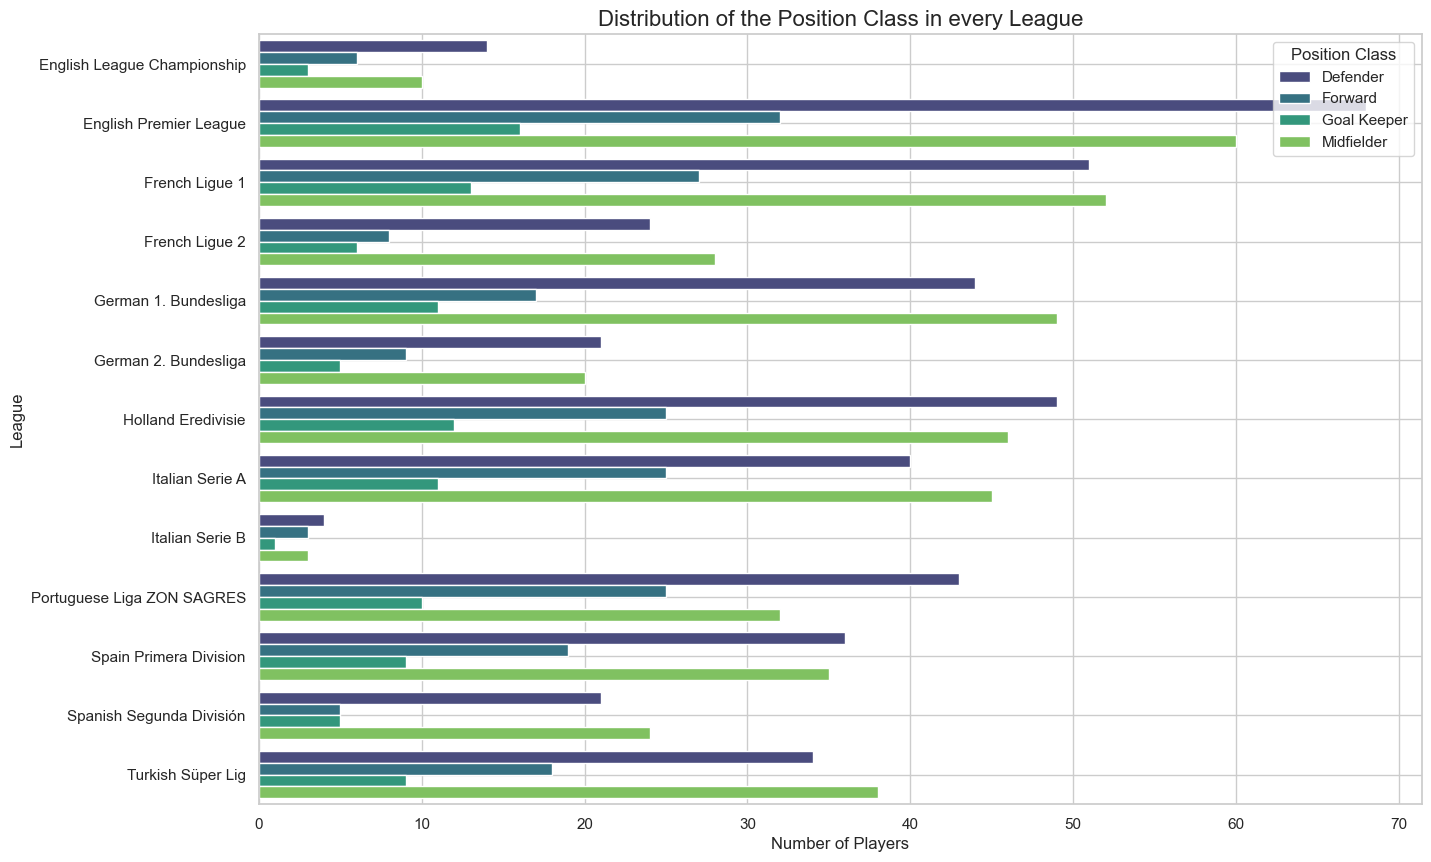

In [101]:
# Calculate the distribution of positions in each league
position_distribution = df.groupby(['league_name', 'Class']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(data=position_distribution, x='count', y='league_name', hue='Class', dodge=True, palette='viridis')

plt.title('Distribution of the Position Class in every League', fontsize=16)
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('League', fontsize=12)
plt.legend(title='Position Class', loc='upper right')
plt.grid(True)

plt.show()


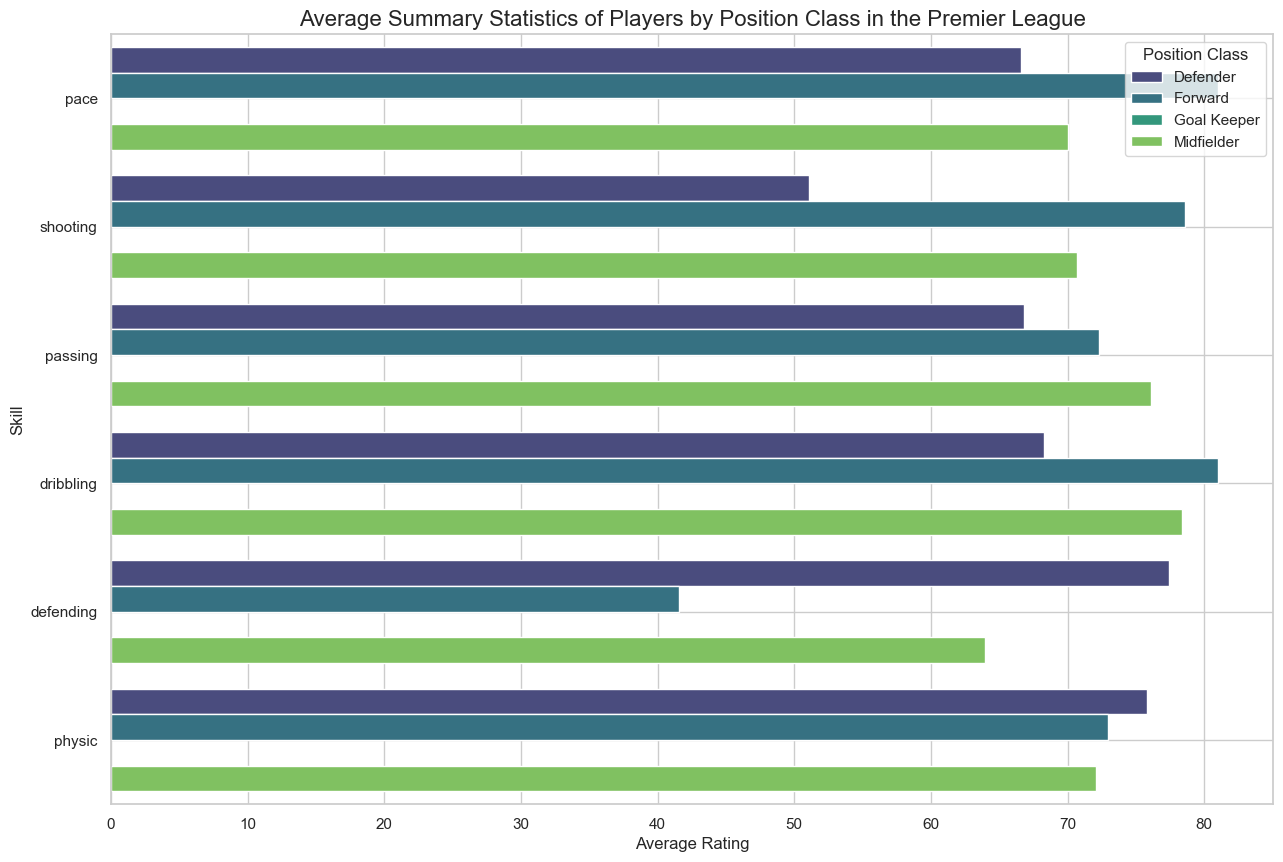

In [102]:
premier_league_df = df[df['league_name'] == 'English Premier League']

# Calculate the average ratings for each position in the Premier League
average_stats = premier_league_df.groupby('Class')[skills].mean().reset_index()

# Transform DataFrame from wide to long format
average_stats_long = pd.melt(average_stats, id_vars=['Class'], value_vars=skills, var_name='Skill', value_name='Average')

# Create the plot
plt.figure(figsize=(15, 10))
sns.barplot(data=average_stats_long, x='Average', y='Skill', hue='Class', dodge=True, palette='viridis')

plt.title('Average Summary Statistics of Players by Position Class in the Premier League', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Skill', fontsize=12)
plt.legend(title='Position Class', loc='upper right')
plt.grid(True)

plt.show()


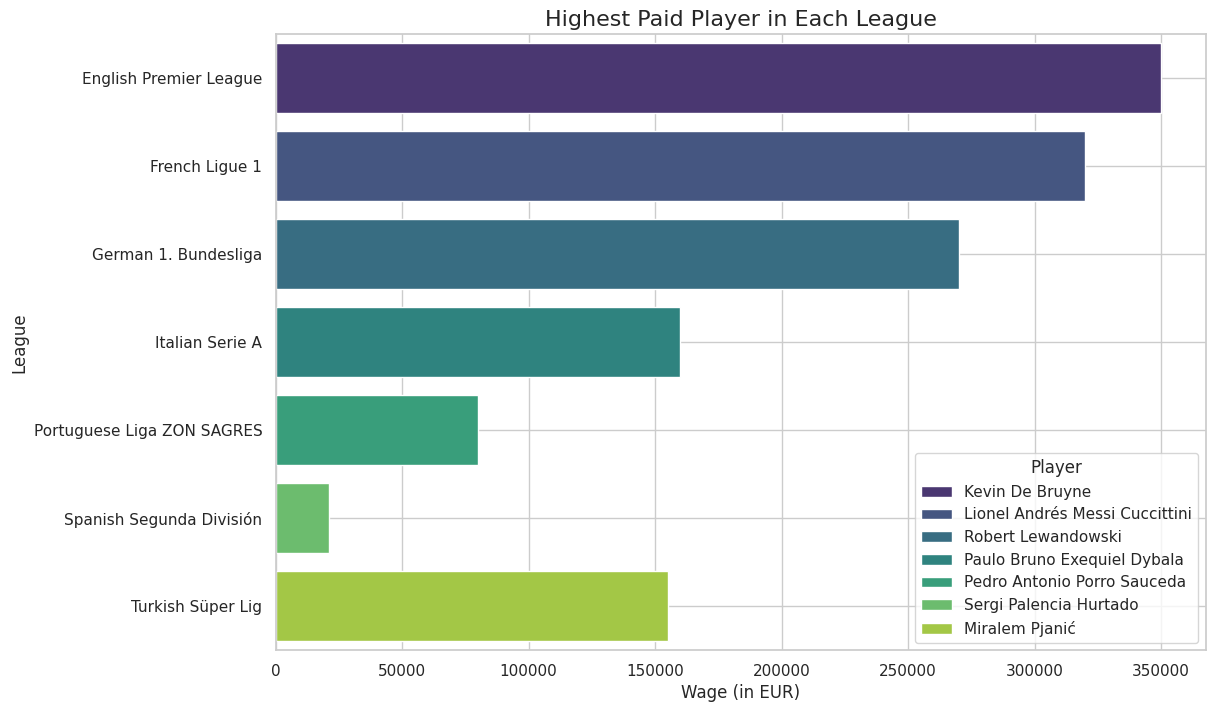

In [103]:
# Set the font to DejaVu Sans to support the necessary characters
plt.rcParams['font.family'] = 'DejaVu Sans'

# Filter data to include only the required leagues with accurate names
leagues_p = [
    'English Premier League', 
    'French Ligue 1', 
    'Italian Serie A', 
    'Spanish Segunda División', 
    'German 1. Bundesliga', 
    'Turkish Süper Lig', 
    'Portuguese Liga ZON SAGRES'
]
filtered_df = df[df['league_name'].isin(leagues_p)]

# Convert the wage_eur column to numeric
filtered_df.loc[:, 'wage_eur'] = pd.to_numeric(filtered_df['wage_eur'], errors='coerce')

# Find the highest-paid player in each league
highest_paid_players = filtered_df.loc[filtered_df.groupby('league_name')['wage_eur'].idxmax()]

# Use the long_name column for player names
name_column = 'long_name'

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(data=highest_paid_players, x='wage_eur', y='league_name', hue=name_column, dodge=False, palette='viridis')

plt.title('Highest Paid Player in Each League', fontsize=16)
plt.xlabel('Wage (in EUR)', fontsize=12)
plt.ylabel('League', fontsize=12)
plt.legend(title='Player')
plt.grid(True)

plt.show()


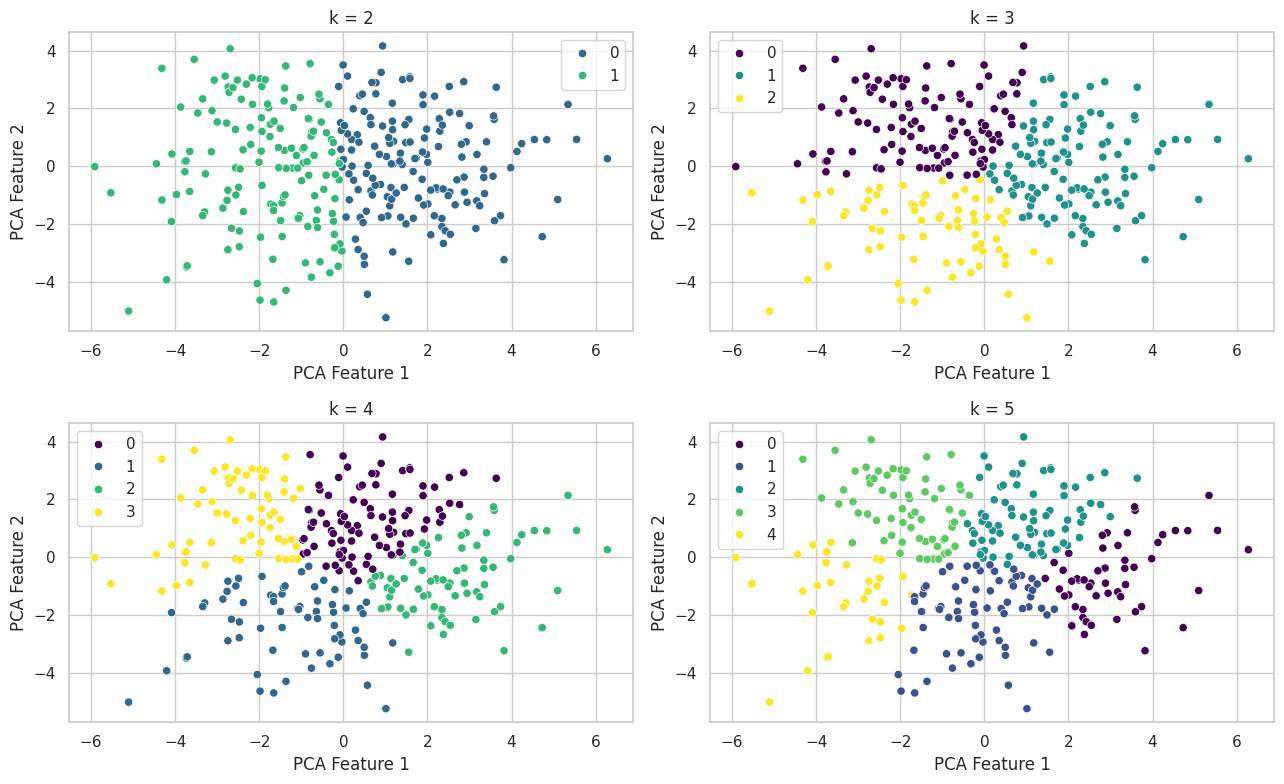

In [104]:
# Filter forward players based on positions
forward_players = df[df['player_positions'].apply(lambda x: any(pos in forward for pos in x))]

# Skills to analyze for forward players
skills_forward = [
    'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 
    'attacking_volleys', 'skill_dribbling', 'skill_fk_accuracy', 'skill_ball_control', 
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'power_shot_power', 'power_stamina', 'power_strength'
]

# Standardize skill data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(forward_players[skills_forward])

# Use PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply K-Means algorithm with k values from 2 to 5
k_values = [2, 3, 4, 5]
clusters = {}
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=25)
    clusters[k] = kmeans.fit_predict(pca_features)

# Display clustering results with plots
fig, axes = plt.subplots(2, 2, figsize=(13, 8))

for ax, k in zip(axes.flatten(), k_values):
    sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters[k], palette='viridis', ax=ax)
    ax.set_title(f'k = {k}')
    ax.set_xlabel('PCA Feature 1')
    ax.set_ylabel('PCA Feature 2')

plt.tight_layout()
plt.show()

          short_name                       long_name  age  overall  potential  \
29        E. Haaland            Erling Braut Haaland   20       88         93   
387            Pedri            Pedro González López   18       81         91   
854   R. Gravenberch           Ryan Jiro Gravenberch   19       78         90   
274        A. Davies           Alphonso Boyle Davies   20       82         89   
661    J. Bellingham  Jude Victor William Bellingham   18       79         89   
855     M. Greenwood                 Mason Greenwood   19       78         89   
862         F. Wirtz           Florian Richard Wirtz   18       78         89   
508          B. Saka                     Bukayo Saka   19       80         88   
1090   D. Szoboszlai              Dominik Szoboszlai   20       77         87   
9686          M. Cho                 Mohamed-Ali Cho   17       66         82   

                club_name nationality_name  
29      Borussia Dortmund           Norway  
387          FC Ba

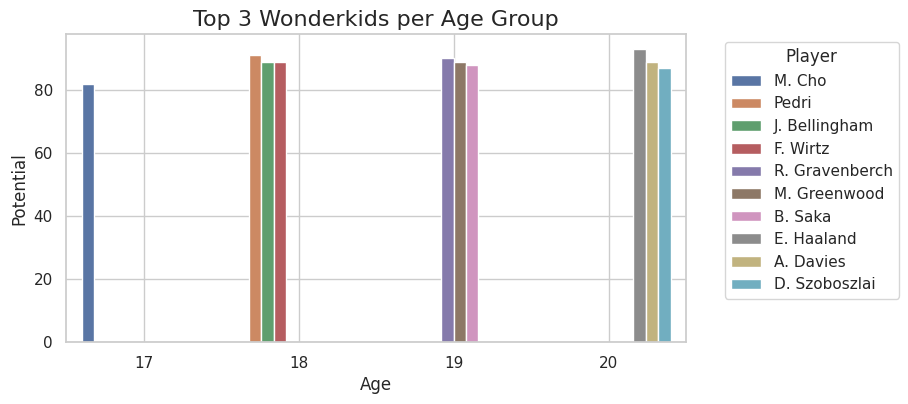

In [105]:
# Filter players under 21 years old
wonderkids = df[df['age'] < 21]

# Sort players by potential rating
sorted_wonderkids = wonderkids.sort_values(by='potential', ascending=False)

# Select the top 3 players for each age
top_3_per_age = sorted_wonderkids.groupby('age').head(3)

# Display information of the top 3 wonderkids by age
print(top_3_per_age[['short_name', 'long_name', 'age', 'overall', 'potential', 'club_name', 'nationality_name']])

# Create a bar plot to visualize
plt.figure(figsize=(8, 4))
sns.barplot(data=top_3_per_age, x='age', y='potential', hue='short_name', dodge=True)
plt.title('Top 3 Wonderkids per Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Potential', fontsize=12)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [106]:
import matplotlib.pyplot as plt
import os

# Tạo thư mục để lưu hình ảnh
output_dir = "output_images"
os.makedirs(output_dir, exist_ok=True)

# Tự động lưu ảnh
plt.savefig(f"{output_dir}/figure_{plt.gcf().number}.png")


<Figure size 640x480 with 0 Axes>